In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Asiaticos.csv')
# Exportar el DataFrame a un archivo HTML
df.to_html('dataframe.html')


1. Descripción del Conjunto de Datos

El conjunto de datos incluye las variables siguientes:

    País: Nombre del país.
    Año: Año de los datos.
    PIB (actual US$): Producto Interno Bruto en dólares actuales.
    Crecimiento del PIB (porcentaje anual): Crecimiento del PIB en porcentaje anual.
    PIB per cápita (actual US$): PIB por americano en dólares actuales.
    Desempleo, total (% de la fuerza laboral total): Tasa de desempleo total como porcentaje de la fuerza laboral total.
    Población, totalidad: Población total.
    Crecimiento de la población (porcentaje anual): Crecimiento anual en porcentaje.
    Esperanza de vida al nacer, total (años): Esperanza de vida al nacer en años.
    Tasa de mortalidad, bebé (por cada 1.000 nacidos vivos): Tasa de mortalidad infantil por cada dorso.


A continuación se presenta un breve análisis específico por variable:

    PIB (actual US$): Esta variable representa el Producto Interno Bruto total en dólares actuales. Se espera que tenga un medio de comunicación alta por la magnitud económica de algunos países.
    PIB per cápita (actual US$): Refleja la riqueza por persona en un país. Es importante para entender el nivel de vida.
    Desempleo: La tasa de desempleo es crucial para evaluar la salud económica y social.
    Población: La población total es fundamental para entender la demografía y su impacto en la economía.
    Esperanza de vida al nacer: Indicar la salud general y calidad de vida en un país.
    Tasa de mortalidad: La tasa de mortalidad infantil es un indicador clave del desarrollo humano y acceso a servicios médicos.


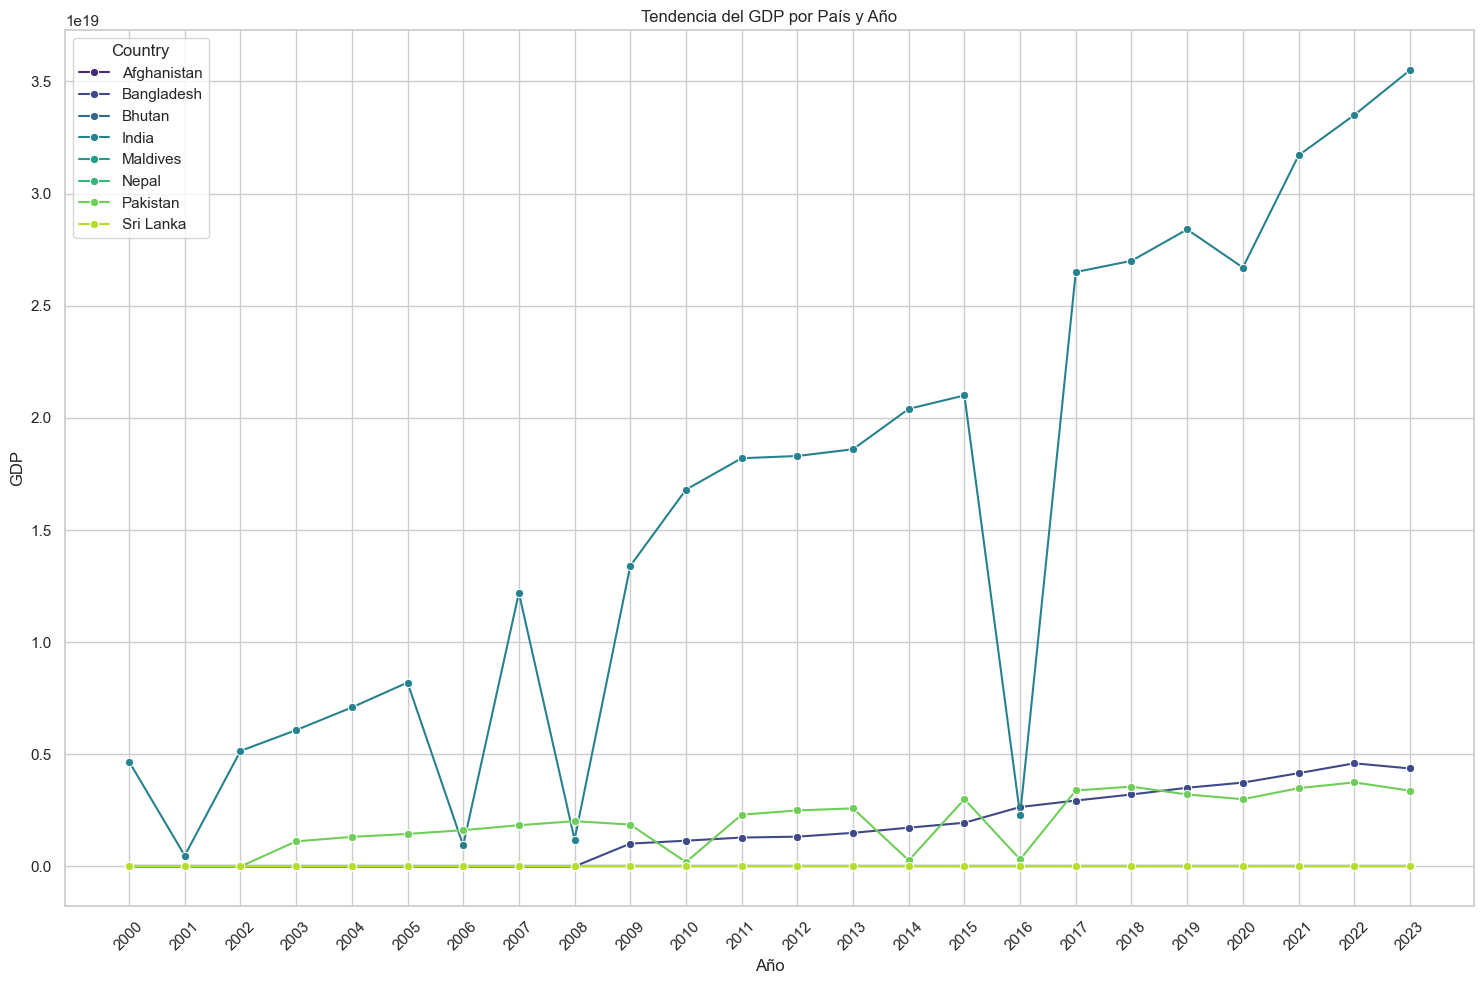

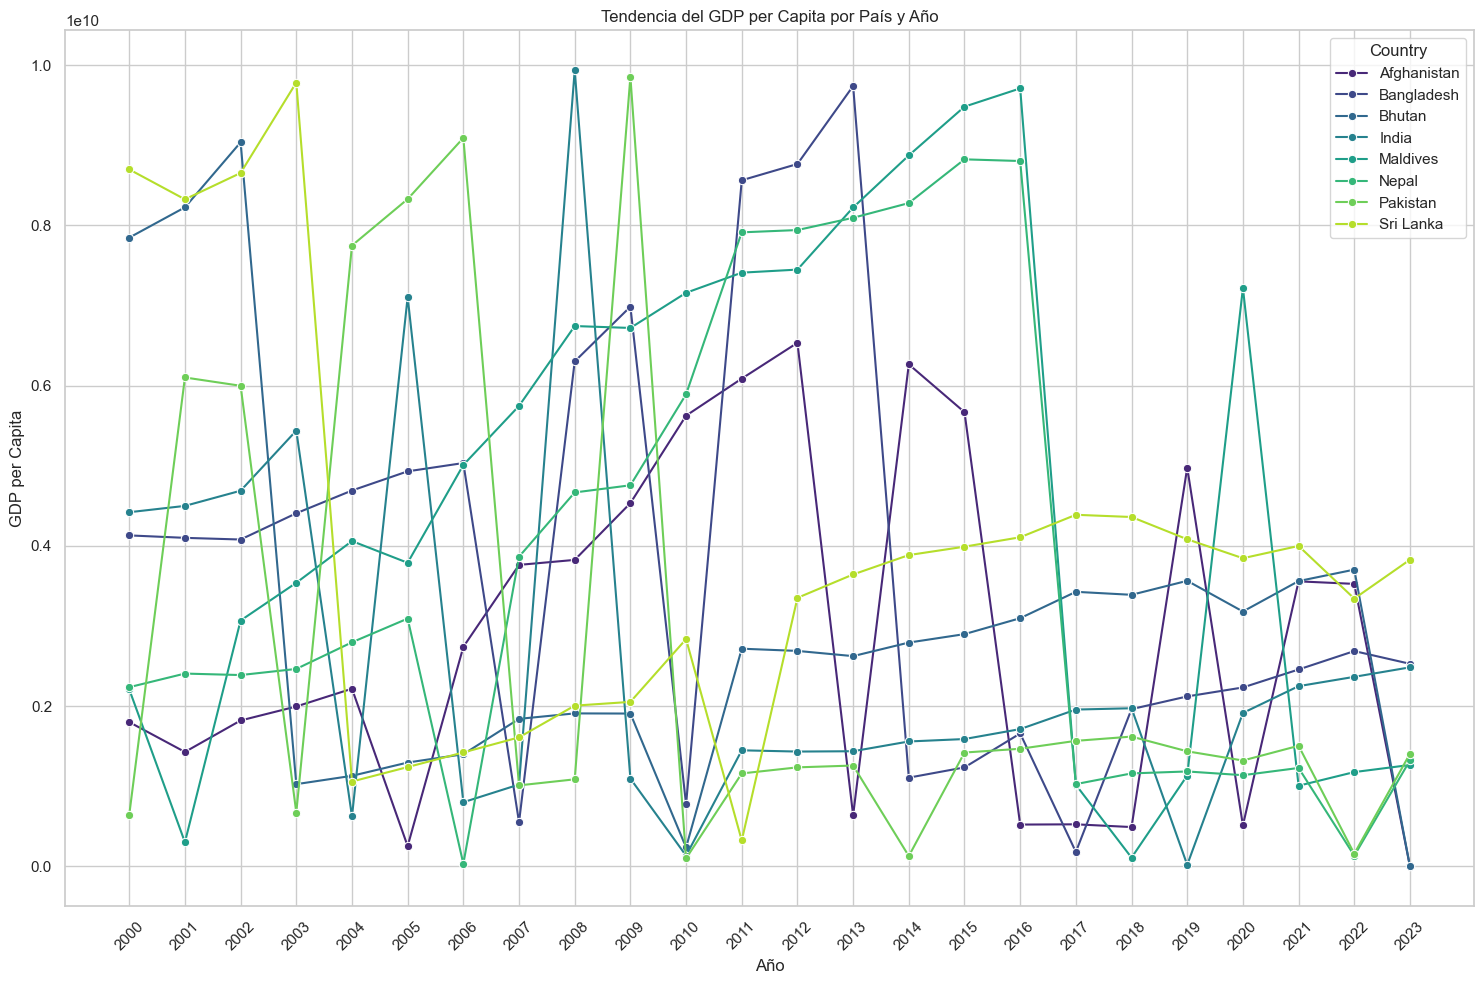

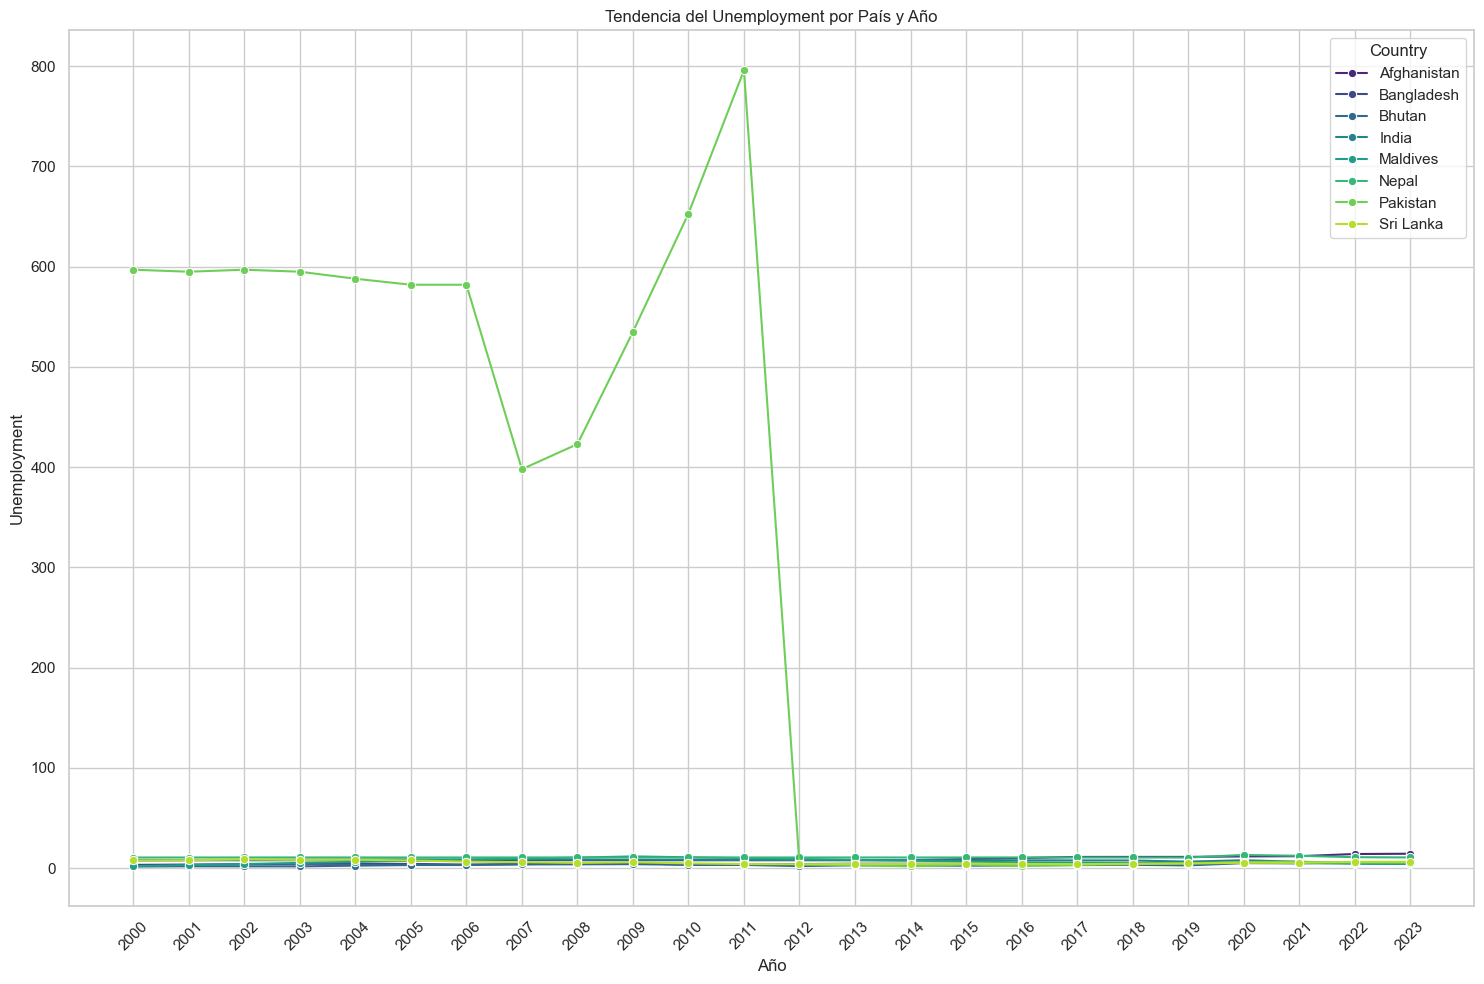

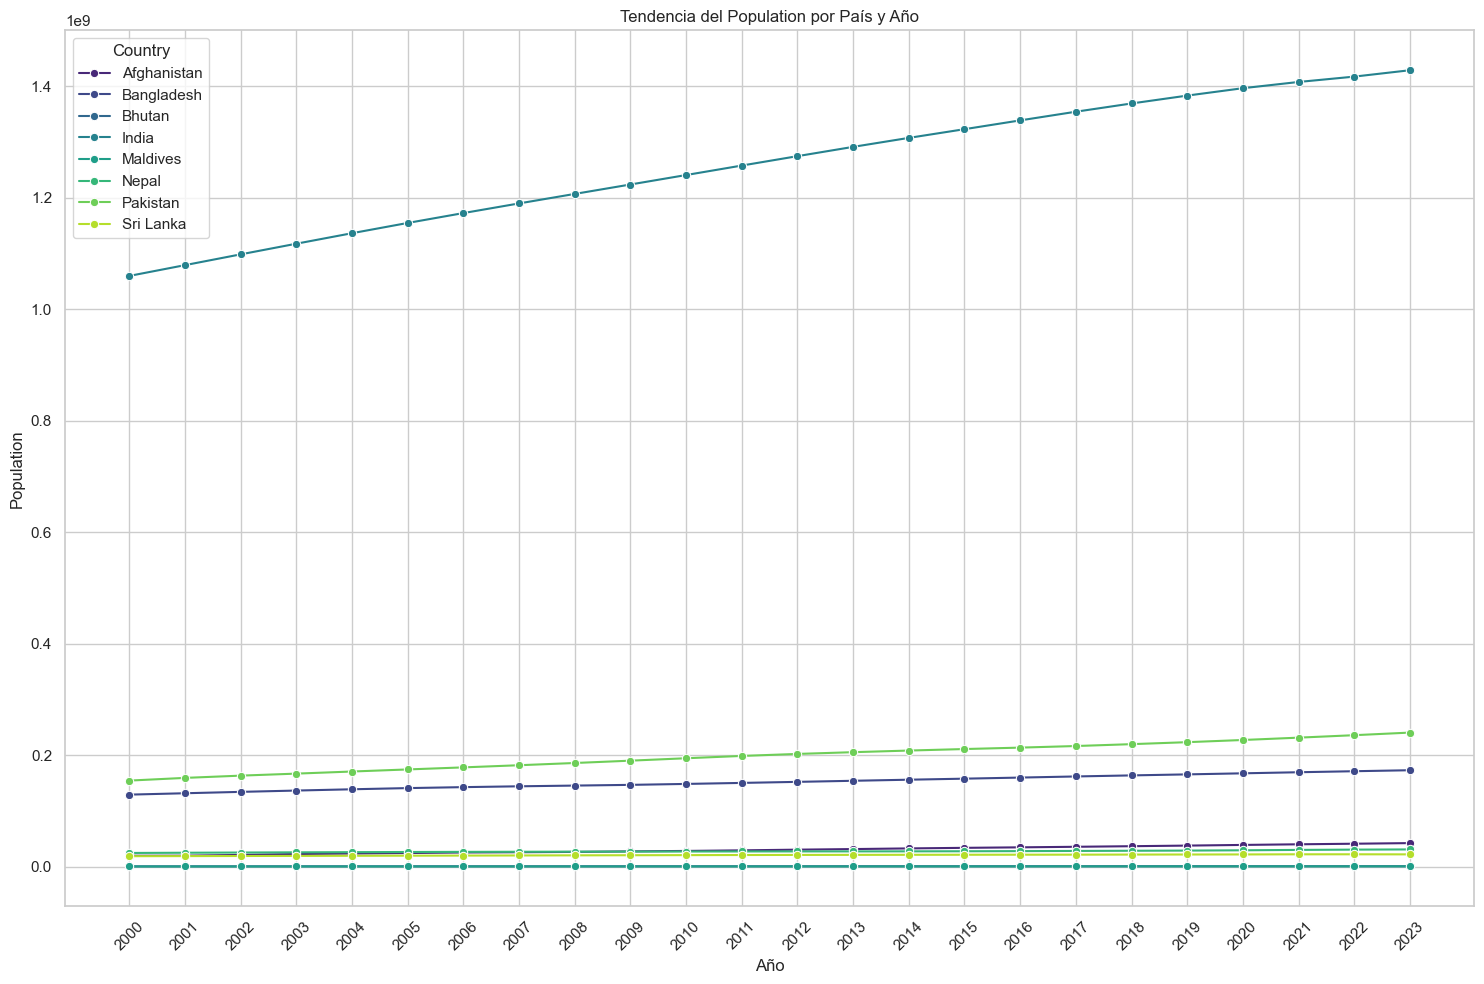

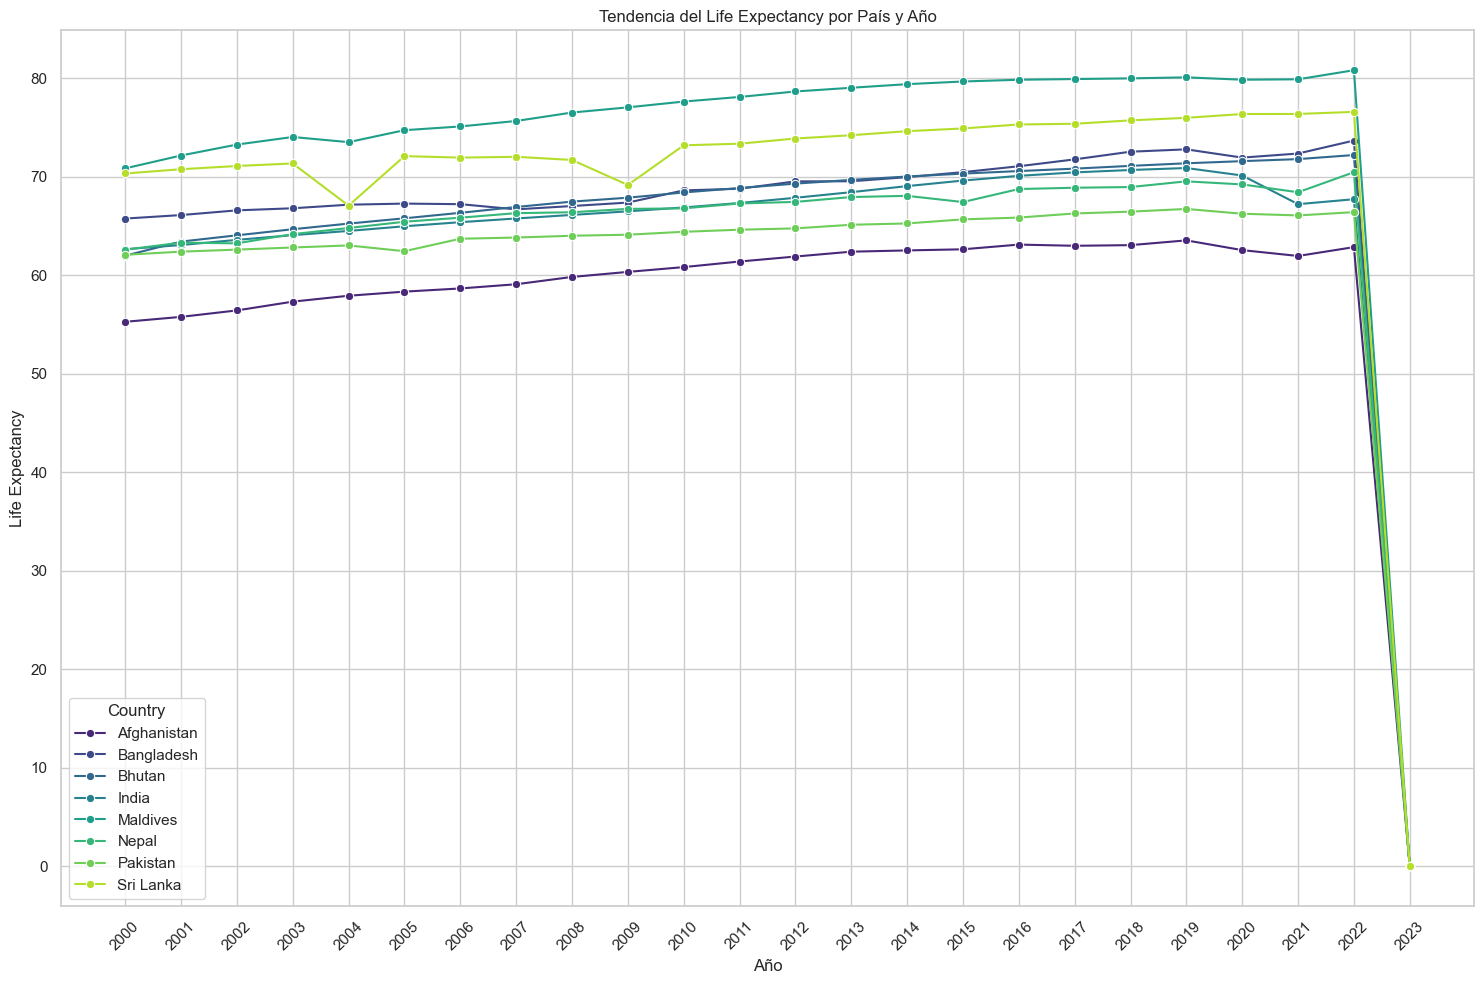

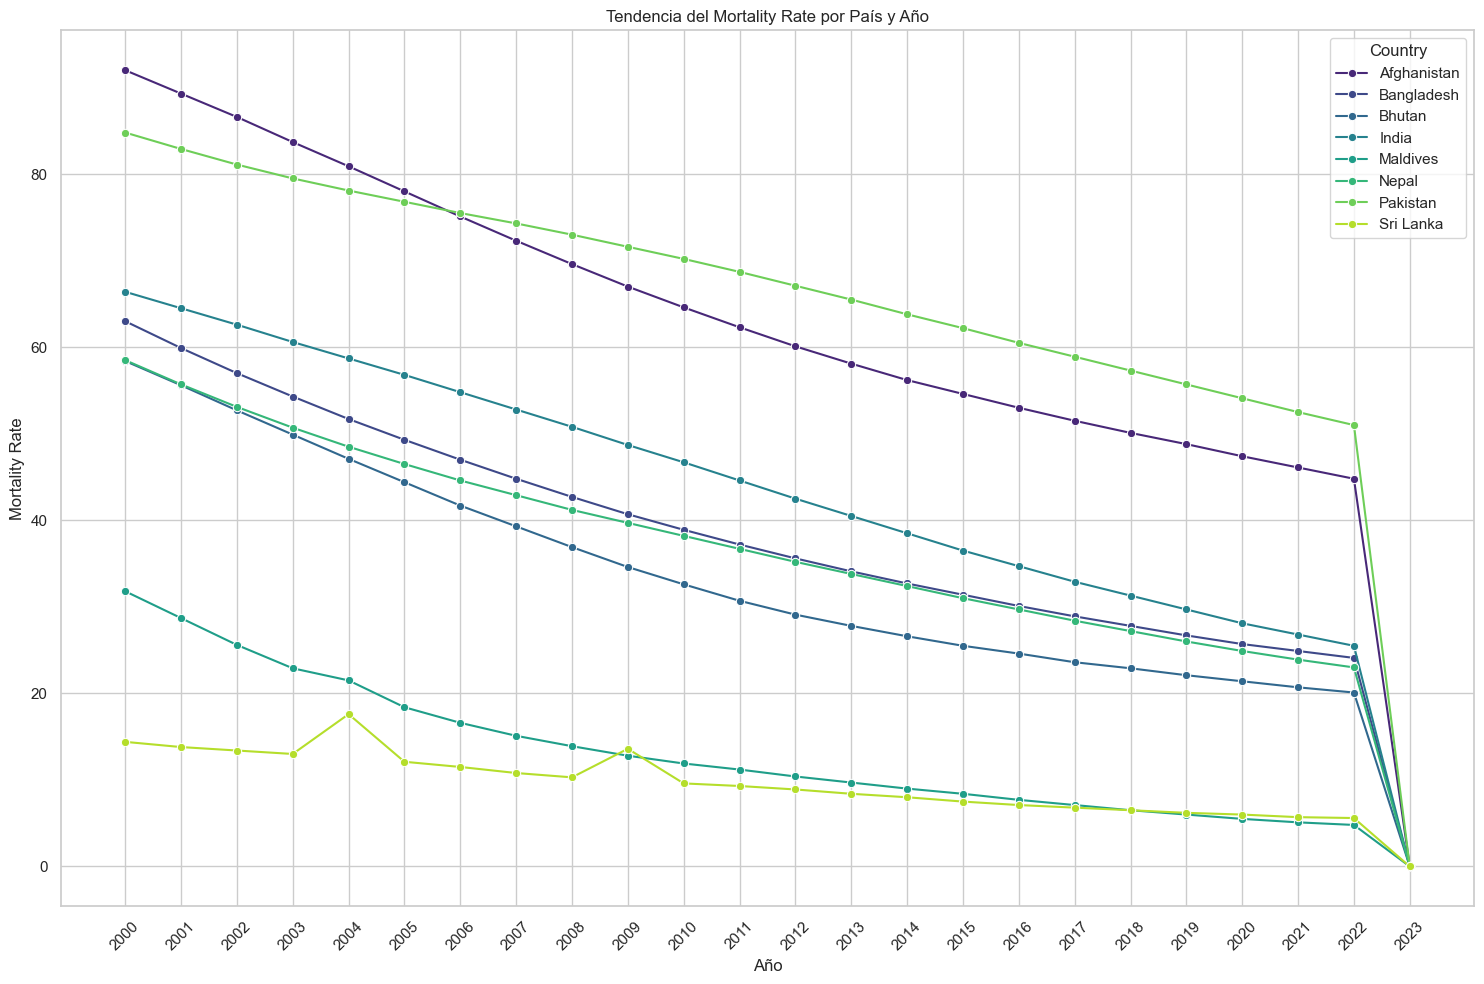

In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos desde el archivo CSV
data = []
with open('Asiaticos.csv', newline='', encoding='utf-8') as archivo_csv:
    lector = csv.DictReader(archivo_csv)
    for row in lector:
        # Limpiar y convertir a float las columnas numéricas
        row['GDP (current US$)'] = float(row['GDP (current US$)'].replace('.', '').replace(',', ''))
        row['GDP per capita (current US$)'] = float(row['GDP per capita (current US$)'].replace('.', '').replace(',', ''))
        row['Unemployment, total (% of total labor force) (modeled ILO estimate)'] = float(row['Unemployment, total (% of total labor force) (modeled ILO estimate)'])
        row['Population, total'] = float(row['Population, total'].replace('.', '').replace(',', ''))
        row['Life expectancy at birth, total (years)'] = float(row['Life expectancy at birth, total (years)'])
        row['Mortality rate, infant (per 1,000 live births)'] = float(row['Mortality rate, infant (per 1,000 live births)'])
        
        data.append(row)

# Convertir a DataFrame de pandas
df = pd.DataFrame(data)

# Calcular estadísticas descriptivas por país y año
estadisticas_por_pais_y_anio = df.groupby(['Country', 'Year']).agg(
    GDP=('GDP (current US$)', 'mean'),
    GDP_per_capita=('GDP per capita (current US$)', 'mean'),
    Unemployment=('Unemployment, total (% of total labor force) (modeled ILO estimate)', 'mean'),
    Population=('Population, total', 'mean'),
    Life_expectancy=('Life expectancy at birth, total (years)', 'mean'),
    Mortality_rate=('Mortality rate, infant (per 1,000 live births)', 'mean')
).reset_index()

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Lista de variables a graficar
variables_a_visualizar = [
    ('GDP', 'GDP'),
    ('GDP per Capita', 'GDP_per_capita'),
    ('Unemployment', 'Unemployment'),
    ('Population', 'Population'),
    ('Life Expectancy', 'Life_expectancy'),
    ('Mortality Rate', 'Mortality_rate')
]

# Crear gráficos para cada variable
for title, column in variables_a_visualizar:
    plt.figure(figsize=(15, 10))
    
    # Crear un gráfico de líneas donde el eje Y son los valores y el eje X son los años
    sns.lineplot(data=estadisticas_por_pais_y_anio,
                 x='Year',
                 y=column,
                 hue='Country',
                 palette='viridis',
                 marker='o')
    
    plt.title(f'Tendencia del {title} por País y Año')
    plt.xlabel('Año')
    plt.ylabel(title)
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()


In [3]:
import csv
import pandas as pd
import folium

# Cargar datos desde el archivo CSV
data = []
with open('Asiaticos.csv', newline='', encoding='utf-8') as archivo_csv:
    lector = csv.DictReader(archivo_csv)
    for row in lector:
        # Limpiar y convertir a float las columnas numéricas
        row['GDP (current US$)'] = float(row['GDP (current US$)'].replace('.', '').replace(',', ''))
        row['GDP per capita (current US$)'] = float(row['GDP per capita (current US$)'].replace('.', '').replace(',', ''))
        row['Unemployment, total (% of total labor force) (modeled ILO estimate)'] = float(row['Unemployment, total (% of total labor force) (modeled ILO estimate)'])
        row['Population, total'] = float(row['Population, total'].replace('.', '').replace(',', ''))
        row['Life expectancy at birth, total (years)'] = float(row['Life expectancy at birth, total (years)'])
        row['Mortality rate, infant (per 1,000 live births)'] = float(row['Mortality rate, infant (per 1,000 live births)'])
        
        data.append(row)

# Convertir a DataFrame de pandas
df = pd.DataFrame(data)

# Diccionario con las coordenadas de los países asiáticos
coordenadas = {
    'China': {'lat': 35.8617, 'lon': 104.1954},
    'India': {'lat': 20.5937, 'lon': 78.9629},
    'Japan': {'lat': 36.2048, 'lon': 138.2529},
    'South Korea': {'lat': 35.9078, 'lon': 127.7669},
    'Indonesia': {'lat': -0.7893, 'lon': 113.9213},
    'Saudi Arabia': {'lat': 23.8859, 'lon': 45.0792},
    'Turkey': {'lat': 38.9637, 'lon': 35.2433},
    'Iran': {'lat': 32.4279, 'lon': 53.6880},
    'Thailand': {'lat': 15.8700, 'lon': 100.9925},
    'Malaysia': {'lat': 4.2105, 'lon': 101.9758},
    'Vietnam': {'lat': 14.0583, 'lon': 108.2772},
    'Philippines': {'lat': 12.8797, 'lon': 121.7740},
    'Pakistan': {'lat': 30.3753, 'lon': 69.3451},
    'Bangladesh': {'lat': 23.6850, 'lon': 90.3563},
    'Sri Lanka': {'lat': 7.8731, 'lon': 80.7718},
    'Nepal': {'lat': 28.3949, 'lon': 84.1240},
    'Myanmar': {'lat': 21.9162, 'lon': 95.9560},
    'Afghanistan': {'lat': 33.9391, 'lon': 67.7100},
    'Kazakhstan': {'lat': 48.0196, 'lon': 66.9237},
    'Uzbekistan': {'lat': 41.3775, 'lon': 64.5853},
    'Iraq': {'lat': 33.2232, 'lon': 43.6793},
    'Syria': {'lat': 34.8021, 'lon': 38.9968},
    'Jordan': {'lat': 30.5852, 'lon': 36.2384},
    'Lebanon': {'lat': 33.8547, 'lon': 35.8623},
    'Israel': {'lat': 31.0461, 'lon': 34.8516},
    'Palestine': {'lat': 31.9474, 'lon': 35.2272},
    'Yemen': {'lat': 15.5527, 'lon': 48.5164},
    'Oman': {'lat': 21.4735, 'lon': 55.9754},
    'Qatar': {'lat': 25.3548, 'lon': 51.1839},
    'Bahrain': {'lat': 26.0667, 'lon': 50.5577},
    'Kuwait': {'lat': 29.3117, 'lon': 47.4818},
    'UAE': {'lat': 23.4241, 'lon': 53.8478},
    'Singapore': {'lat': 1.3521, 'lon': 103.8198},
    'Brunei': {'lat': 4.5353, 'lon': 114.7277},
    'Laos': {'lat': 19.8563, 'lon': 102.4955},
    'Cambodia': {'lat': 12.5657, 'lon': 104.9910},
    'Mongolia': {'lat': 46.8625, 'lon': 103.8467},
    'North Korea': {'lat': 40.3399, 'lon': 127.5101},
    'Maldives': {'lat': 3.2028, 'lon': 73.2207},
    'Bhutan': {'lat': 27.5142, 'lon': 90.4336},
    'East Timor': {'lat': -8.8742, 'lon': 125.7275},
    'Armenia': {'lat': 40.0691, 'lon': 45.0382},
    'Azerbaijan': {'lat': 40.1431, 'lon': 47.5769},
    'Georgia': {'lat': 42.3154, 'lon': 43.3569},
    'Cyprus': {'lat': 35.1264, 'lon': 33.4299},
}

# Agregar coordenadas al DataFrame
df['Latitude'] = df['Country'].map(lambda x: coordenadas[x]['lat'] if x in coordenadas else None)
df['Longitude'] = df['Country'].map(lambda x: coordenadas[x]['lon'] if x in coordenadas else None)

# Filtrar filas con coordenadas válidas
df = df.dropna(subset=['Latitude', 'Longitude'])

# Crear un mapa centrado en Asia y ajustar los límites para mostrar todo el continente
m = folium.Map(location=[34.0479, 100.6197], zoom_start=4)  # Coordenadas aproximadas del centro de Asia

# Ajustar los límites del mapa para que se centren en Asia
sw = [5.0, 60.0]  # Coordenadas del suroeste (aproximadamente)
ne = [55.0, 150.0]  # Coordenadas del noreste (aproximadamente)
m.fit_bounds([sw, ne])

# Agregar marcadores al mapa
for _, row in df.iterrows():
    popup_text = (f"Country: {row['Country']}<br>"
                  f"GDP: {row['GDP (current US$)']}<br>"
                  f"GDP per Capita: {row['GDP per capita (current US$)']}<br>"
                  f"Unemployment: {row['Unemployment, total (% of total labor force) (modeled ILO estimate)']}<br>"
                  f"Population: {row['Population, total']}<br>"
                  f"Life Expectancy: {row['Life expectancy at birth, total (years)']}<br>"
                  f"Mortality Rate: {row['Mortality rate, infant (per 1,000 live births)']}")
    
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=popup_text,
        tooltip=row['Country']
    ).add_to(m)

# Guardar el mapa en un archivo HTML
m.save('mapa.html')

# Mostrar el mapa en un Jupyter Notebook
m


Pruebas de distribución para GDP por país:
País: Afghanistan, Estadística: 0.883939781096396, Valor p: 0.00998430912567422
Los datos no siguen una distribución normal


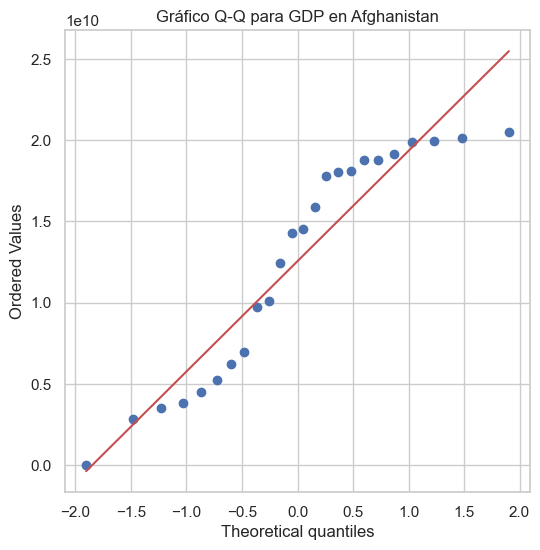

País: Bhutan, Estadística: 0.8457235656681671, Valor p: 0.0018228032909341745
Los datos no siguen una distribución normal


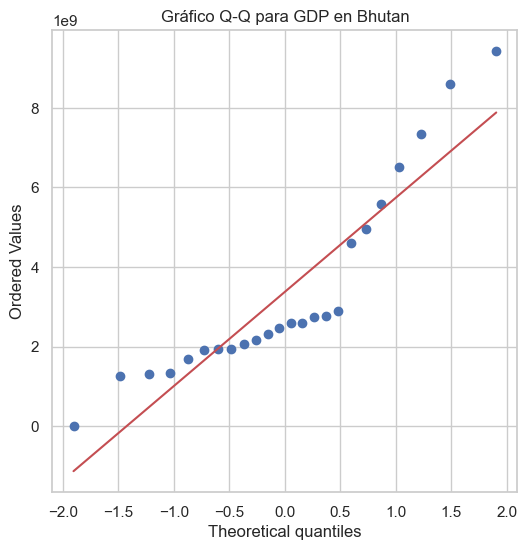

País: Bangladesh, Estadística: 0.861164078564136, Valor p: 0.0035481961551869523
Los datos no siguen una distribución normal


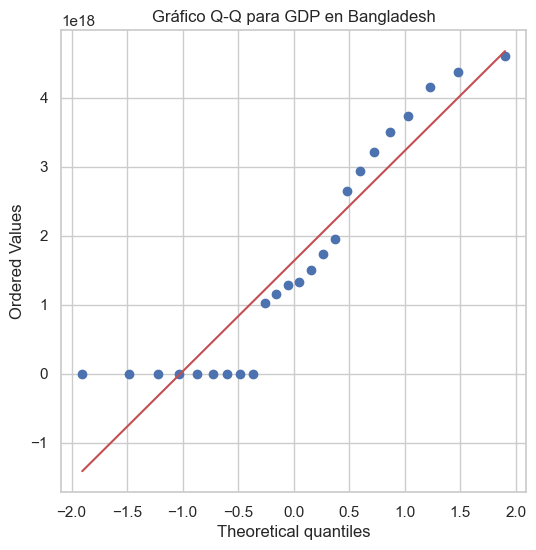

País: India, Estadística: 0.9370925615684631, Valor p: 0.14047630153236368
Los datos parecen seguir una distribución normal


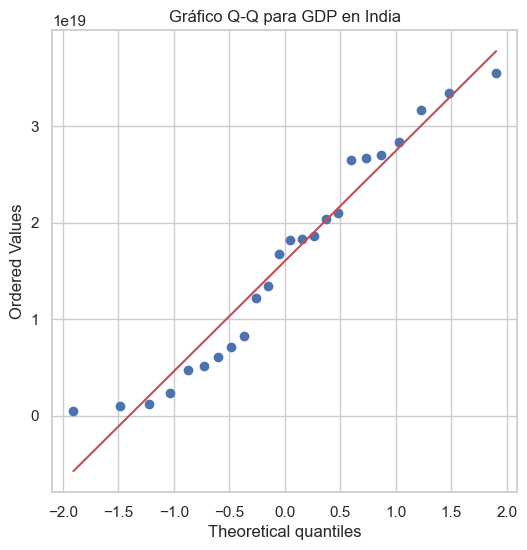

País: Maldives, Estadística: 0.9518643194228764, Valor p: 0.29719988279013304
Los datos parecen seguir una distribución normal


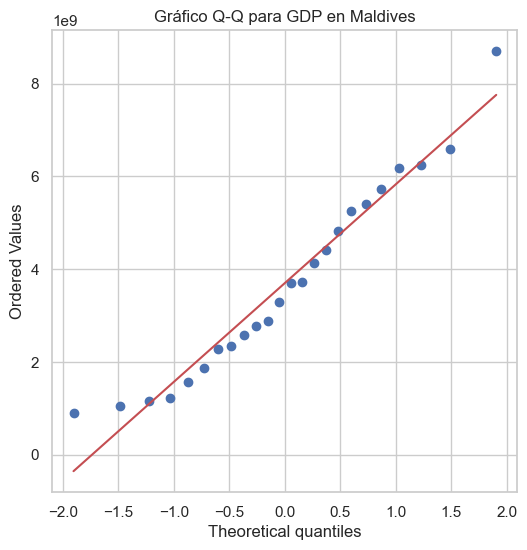

País: Sri Lanka, Estadística: 0.8551327452526578, Valor p: 0.0027263782680992986
Los datos no siguen una distribución normal


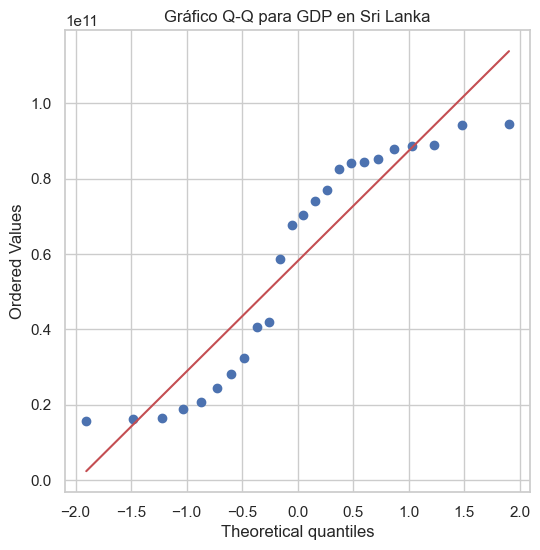

País: Nepal, Estadística: 0.9121235782414626, Valor p: 0.03922580302063463
Los datos no siguen una distribución normal


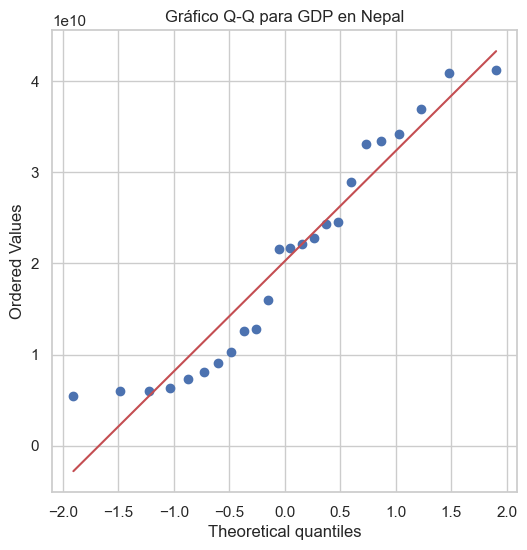

País: Pakistan, Estadística: 0.9126326298563123, Valor p: 0.040241015825482854
Los datos no siguen una distribución normal


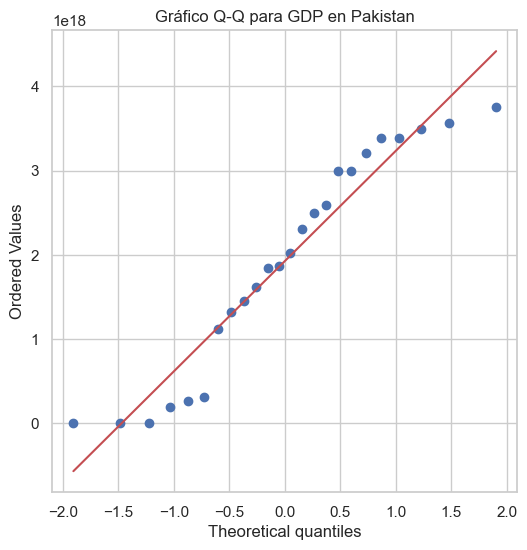


Pruebas de distribución para GDP per capita por país:
País: Afghanistan, Estadística: 0.9145293971031334, Valor p: 0.04427075341344334
Los datos no siguen una distribución normal


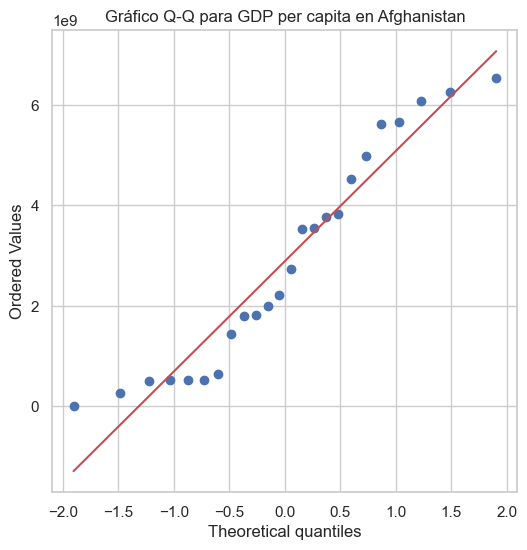

País: Bhutan, Estadística: 0.8258739676753799, Valor p: 0.0008050097787806416
Los datos no siguen una distribución normal


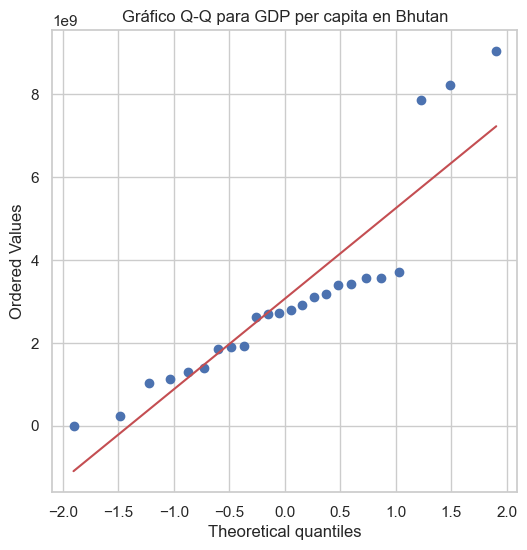

País: Bangladesh, Estadística: 0.9263436809553517, Valor p: 0.08078362844799869
Los datos parecen seguir una distribución normal


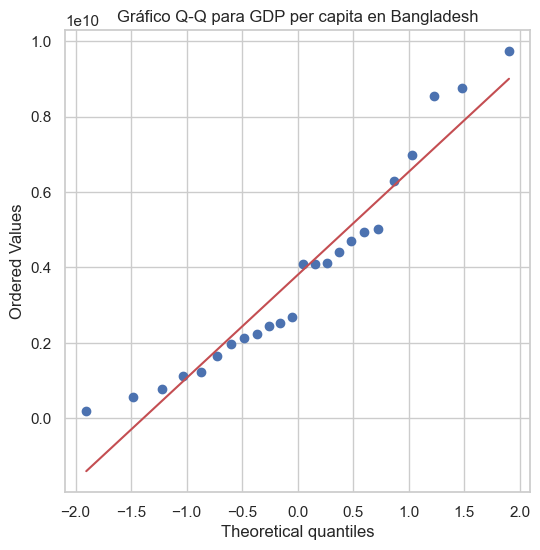

País: India, Estadística: 0.8117429592787282, Valor p: 0.0004612016398477869
Los datos no siguen una distribución normal


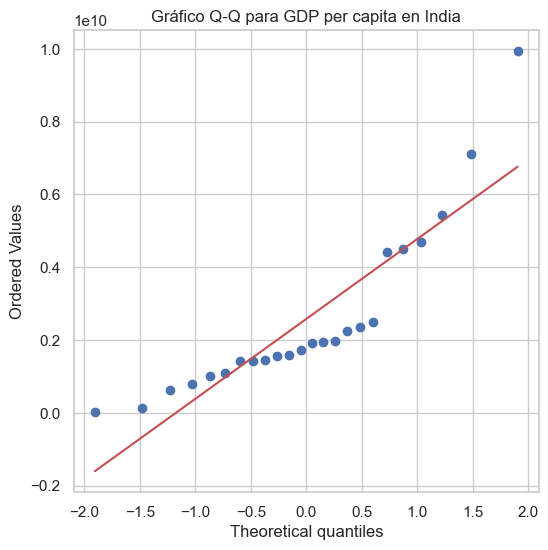

País: Maldives, Estadística: 0.9199693121165923, Valor p: 0.05831759955127612
Los datos parecen seguir una distribución normal


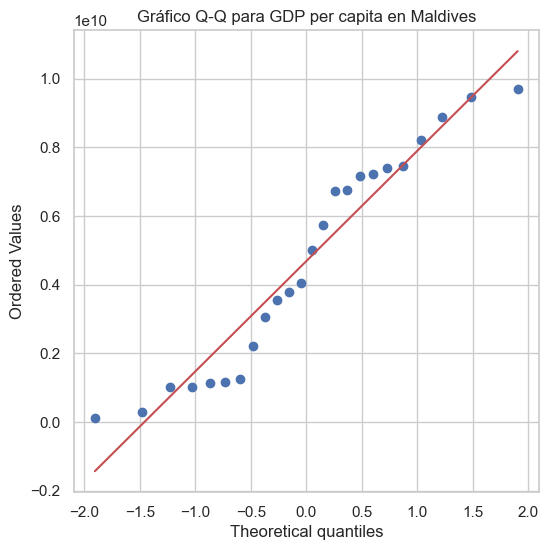

País: Sri Lanka, Estadística: 0.8640205663912055, Valor p: 0.0040258011902712925
Los datos no siguen una distribución normal


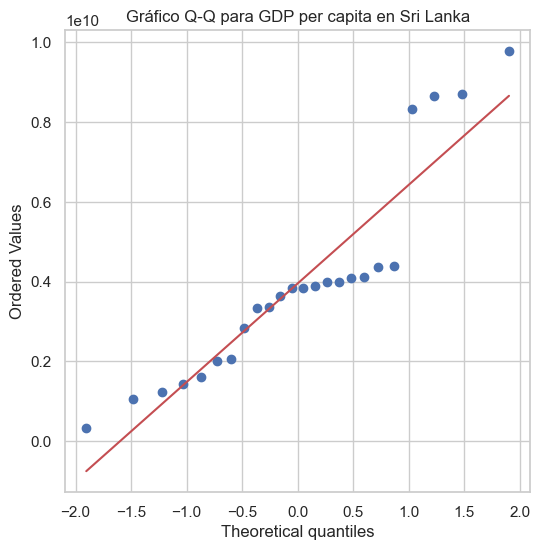

País: Nepal, Estadística: 0.8708853261737864, Valor p: 0.005475254497163649
Los datos no siguen una distribución normal


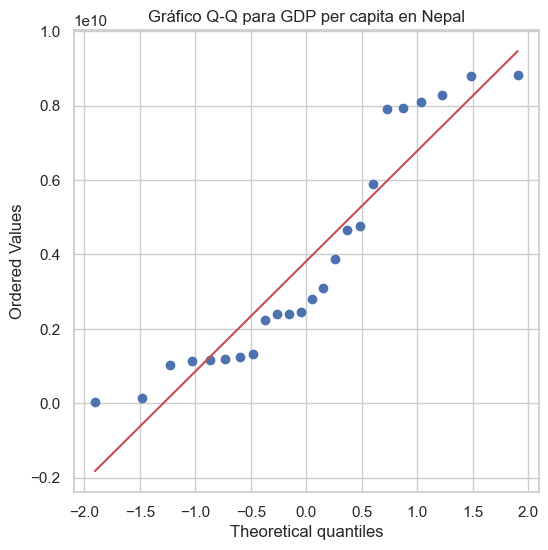

País: Pakistan, Estadística: 0.7149040732723726, Valor p: 1.595486107010223e-05
Los datos no siguen una distribución normal


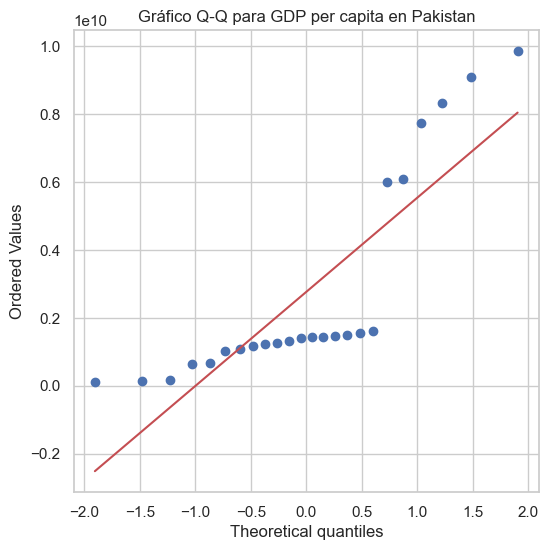


Pruebas de distribución para Unemployment por país:
País: Afghanistan, Estadística: 0.7073380917595603, Valor p: 1.2611422795788726e-05
Los datos no siguen una distribución normal


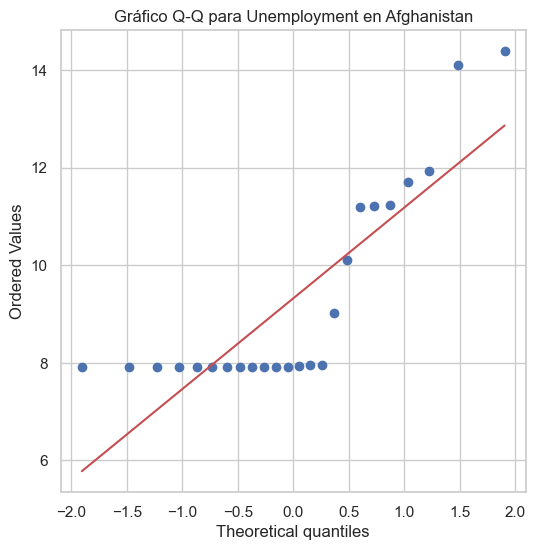

País: Bhutan, Estadística: 0.9200576918183945, Valor p: 0.058580518516886025
Los datos parecen seguir una distribución normal


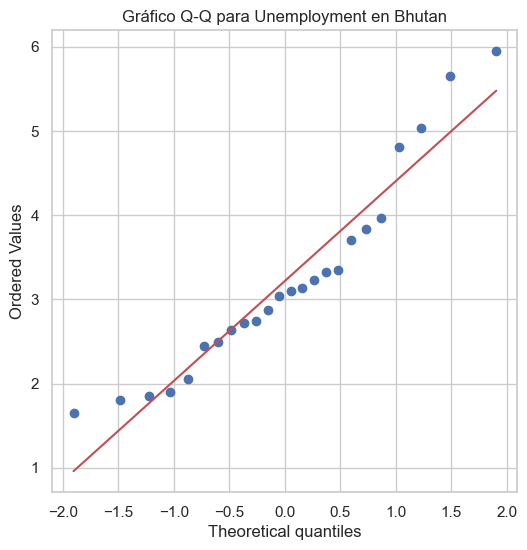

País: Bangladesh, Estadística: 0.9481629623220765, Valor p: 0.24713907321559186
Los datos parecen seguir una distribución normal


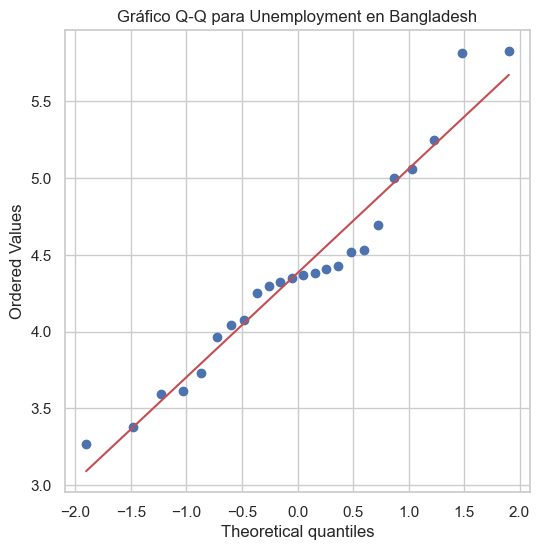

País: India, Estadística: 0.7056566084547744, Valor p: 1.1974779365195231e-05
Los datos no siguen una distribución normal


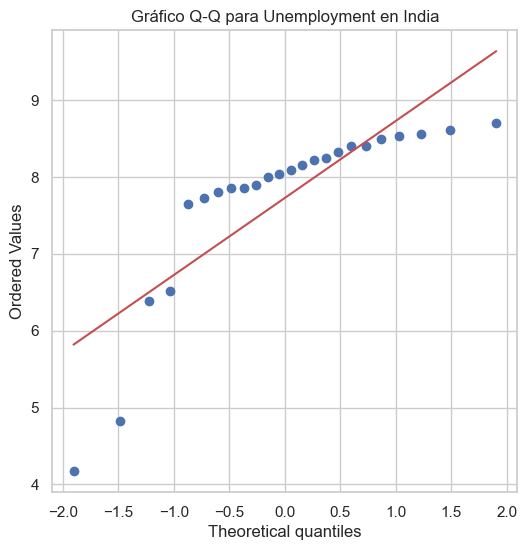

País: Maldives, Estadística: 0.9608043846062772, Valor p: 0.45479837853009
Los datos parecen seguir una distribución normal


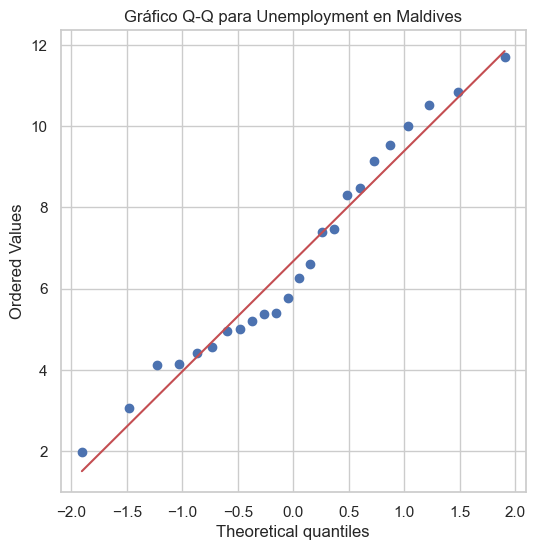

País: Sri Lanka, Estadística: 0.8927554469177321, Valor p: 0.015160797261443261
Los datos no siguen una distribución normal


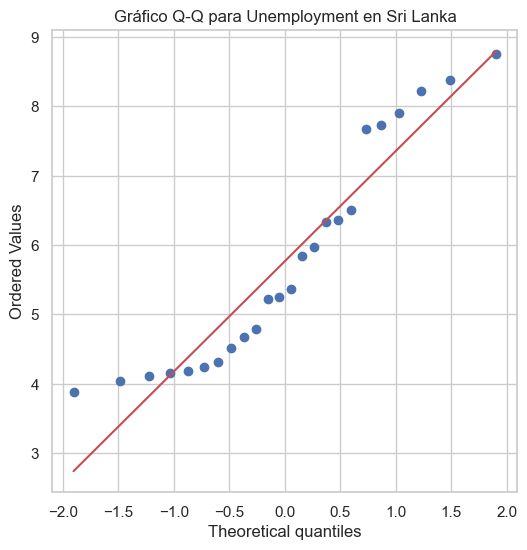

País: Nepal, Estadística: 0.3888123566569419, Valor p: 5.509004382029097e-09
Los datos no siguen una distribución normal


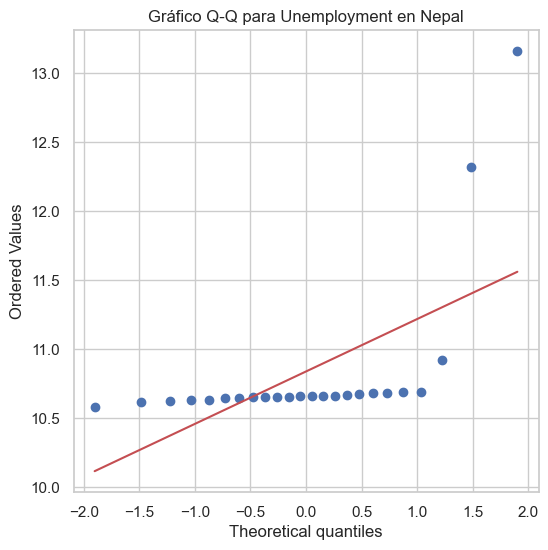

País: Pakistan, Estadística: 0.752362118803309, Valor p: 5.39318551325288e-05
Los datos no siguen una distribución normal


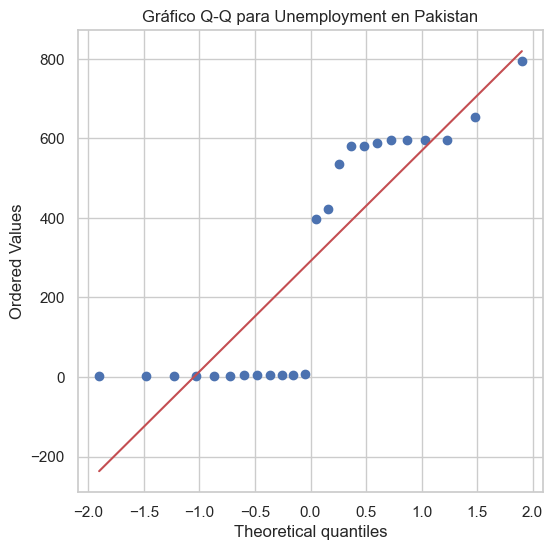


Pruebas de distribución para Population por país:
País: Afghanistan, Estadística: 0.9589784071841527, Valor p: 0.41824356327761614
Los datos parecen seguir una distribución normal


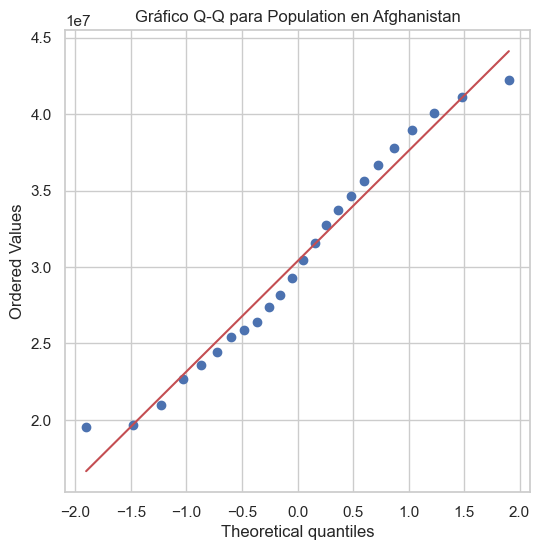

País: Bhutan, Estadística: 0.9443440759020764, Valor p: 0.20370573425303495
Los datos parecen seguir una distribución normal


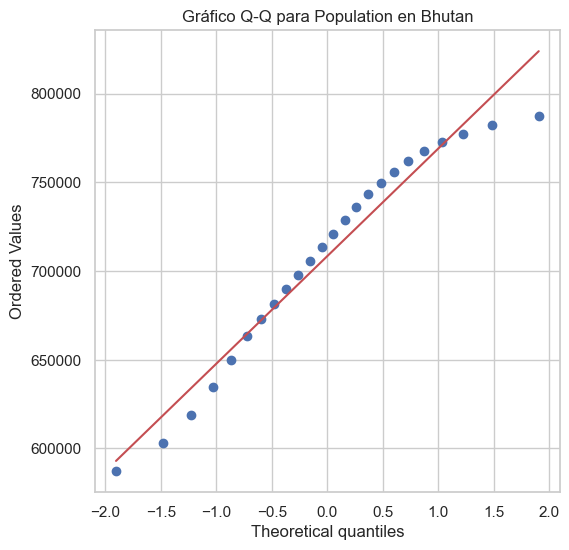

País: Bangladesh, Estadística: 0.967232259918408, Valor p: 0.5993532859804932
Los datos parecen seguir una distribución normal


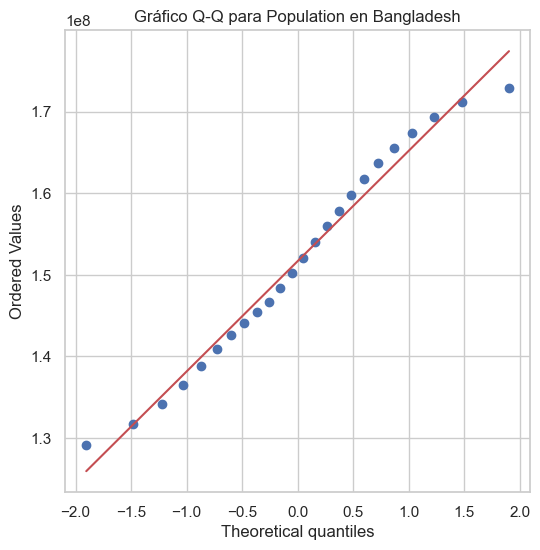

País: India, Estadística: 0.9506566535027221, Valor p: 0.27994828709250036
Los datos parecen seguir una distribución normal


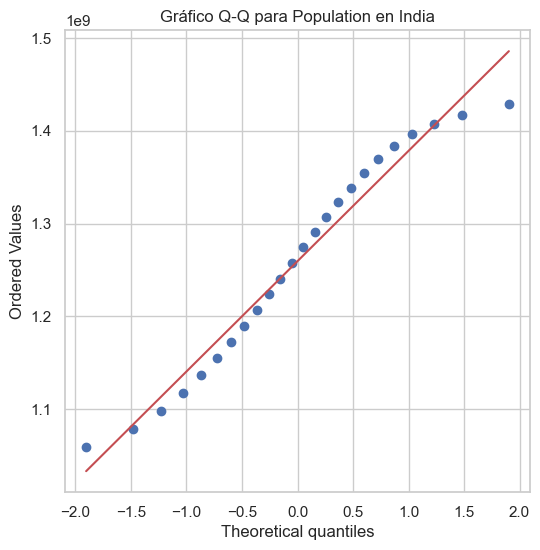

País: Maldives, Estadística: 0.8959535998245781, Valor p: 0.01768336013436554
Los datos no siguen una distribución normal


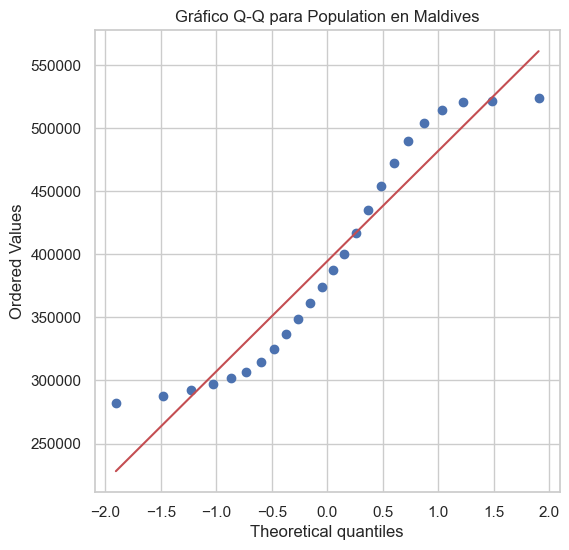

País: Sri Lanka, Estadística: 0.9372382177260968, Valor p: 0.1415334293406214
Los datos parecen seguir una distribución normal


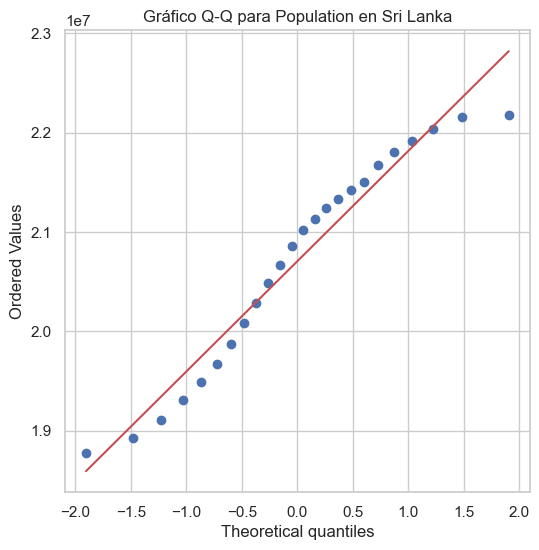

País: Nepal, Estadística: 0.9692658461987784, Valor p: 0.6488843177490122
Los datos parecen seguir una distribución normal


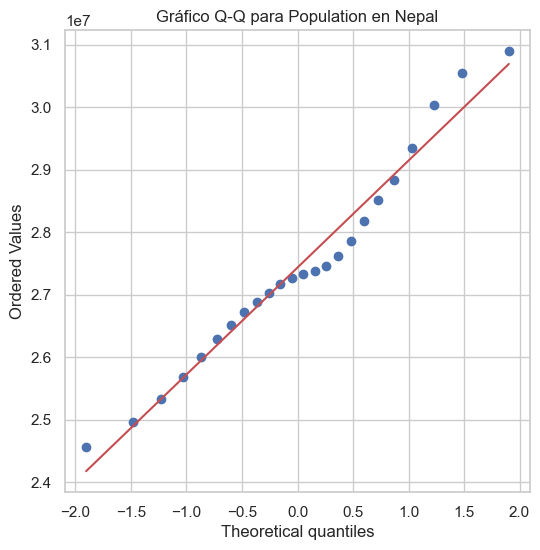

País: Pakistan, Estadística: 0.9657986678874259, Valor p: 0.5652779828817412
Los datos parecen seguir una distribución normal


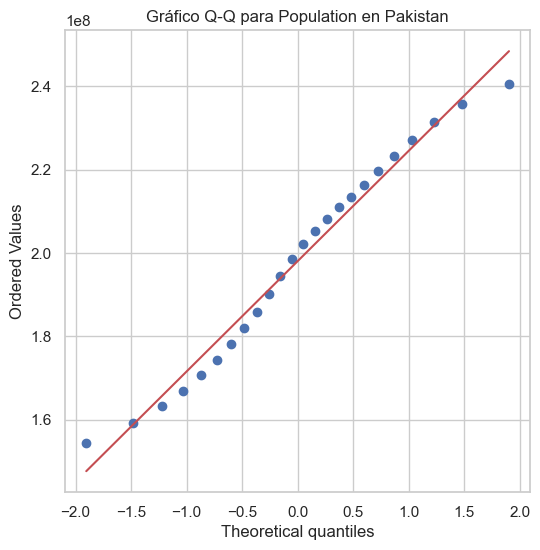


Pruebas de distribución para Life expectancy por país:
País: Afghanistan, Estadística: 0.3787070067404287, Valor p: 4.523274028893846e-09
Los datos no siguen una distribución normal


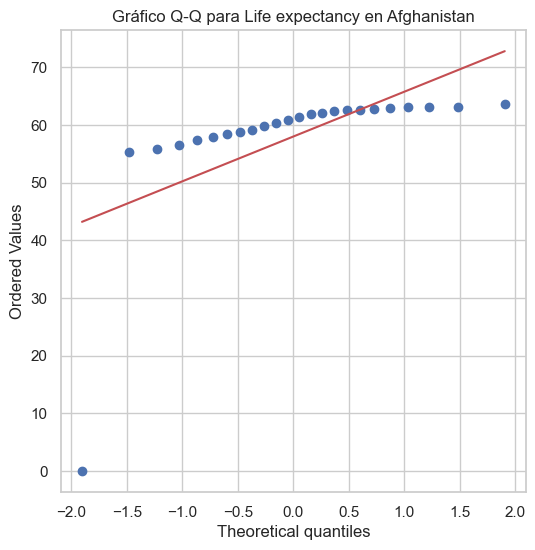

País: Bhutan, Estadística: 0.3864859945209437, Valor p: 5.263561715332659e-09
Los datos no siguen una distribución normal


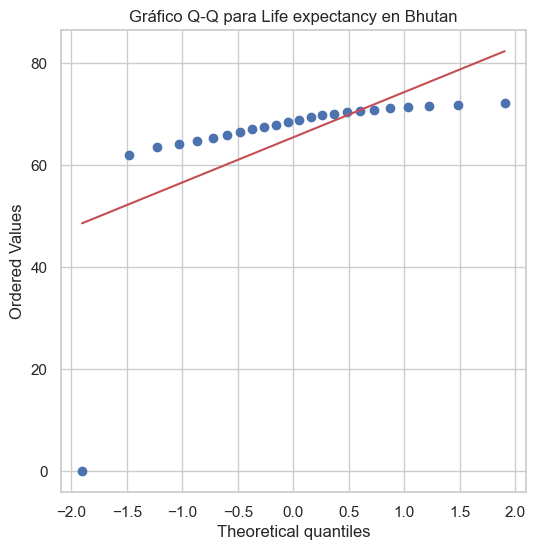

País: Bangladesh, Estadística: 0.3557168525317893, Valor p: 2.9110841375197288e-09
Los datos no siguen una distribución normal


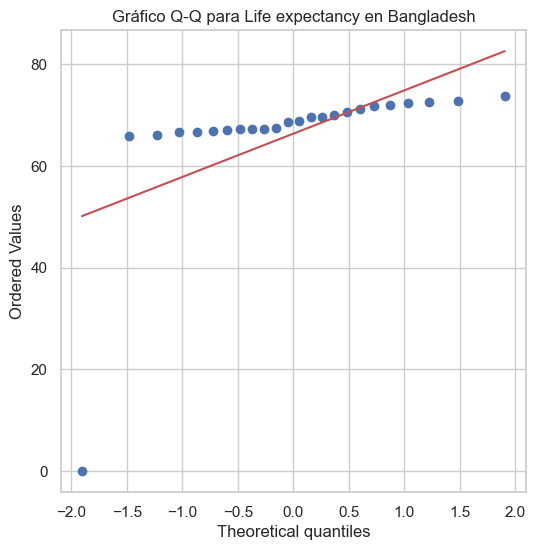

País: India, Estadística: 0.36738177240851655, Valor p: 3.6357073636227863e-09
Los datos no siguen una distribución normal


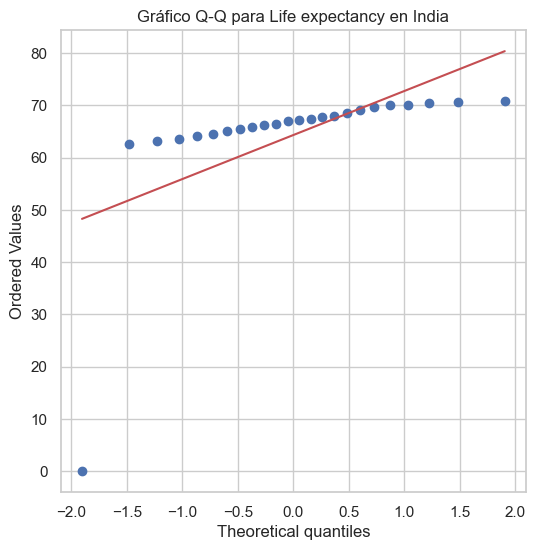

País: Maldives, Estadística: 0.35950701574625665, Valor p: 3.1281805370461775e-09
Los datos no siguen una distribución normal


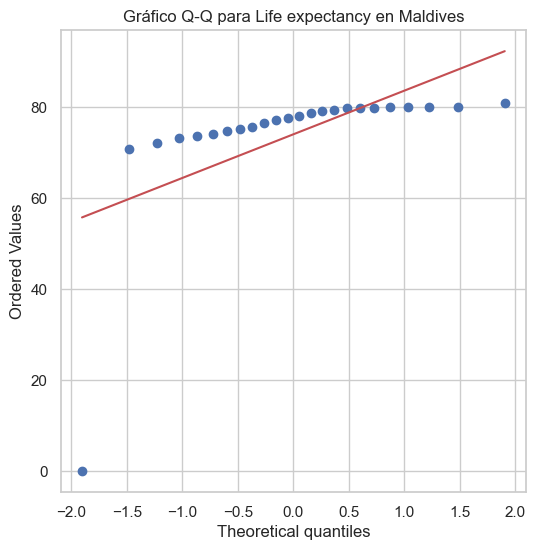

País: Sri Lanka, Estadística: 0.34986335155933623, Valor p: 2.6064702227607953e-09
Los datos no siguen una distribución normal


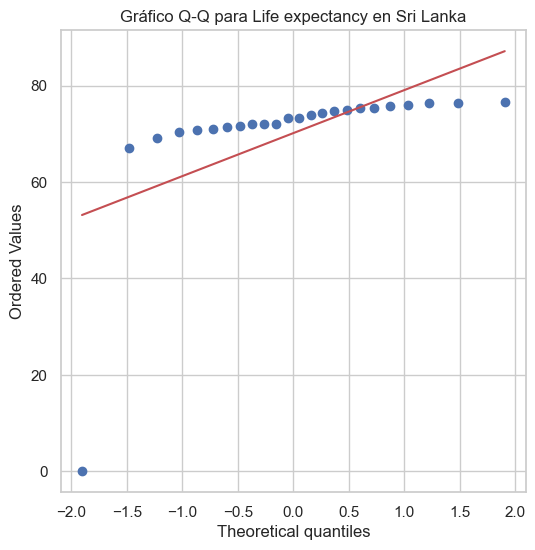

País: Nepal, Estadística: 0.3411298940044758, Valor p: 2.2129322626302493e-09
Los datos no siguen una distribución normal


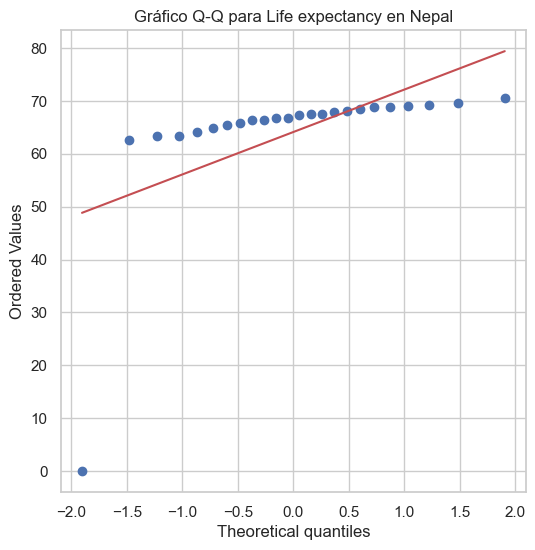

País: Pakistan, Estadística: 0.302300042731001, Valor p: 1.087329186553692e-09
Los datos no siguen una distribución normal


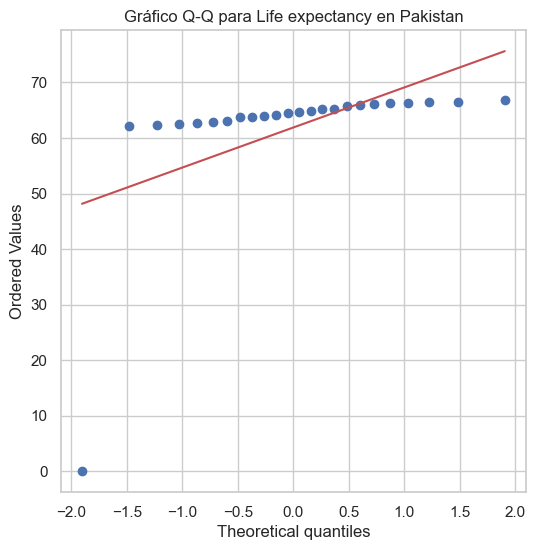


Pruebas de distribución para Mortality rate por país:
País: Afghanistan, Estadística: 0.9088485308616625, Valor p: 0.03330104409168159
Los datos no siguen una distribución normal


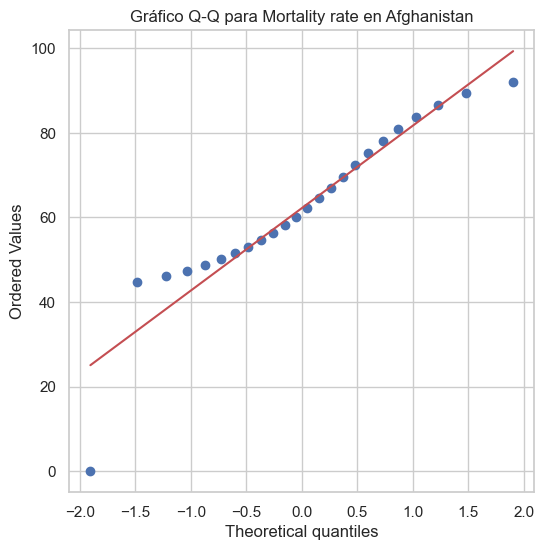

País: Bhutan, Estadística: 0.9540476217436177, Valor p: 0.33075618263955386
Los datos parecen seguir una distribución normal


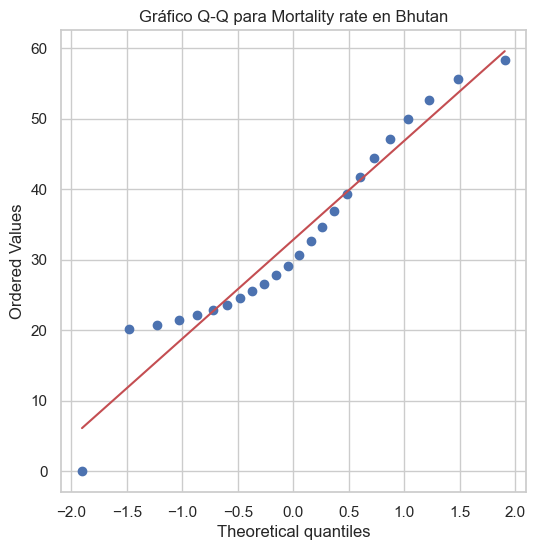

País: Bangladesh, Estadística: 0.9590349131228509, Valor p: 0.41934149918975405
Los datos parecen seguir una distribución normal


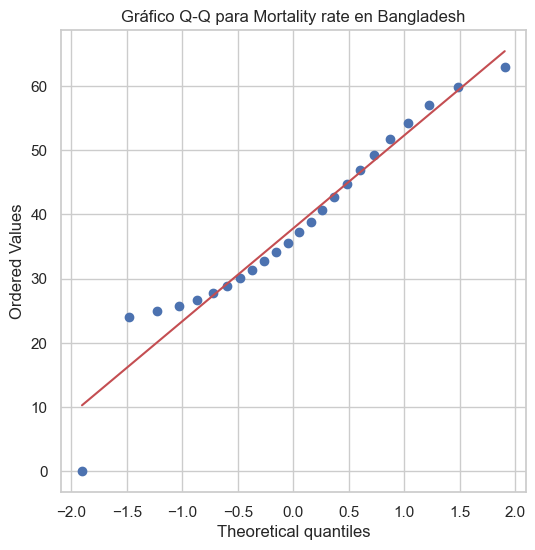

País: India, Estadística: 0.9514420334093412, Valor p: 0.2910634684823221
Los datos parecen seguir una distribución normal


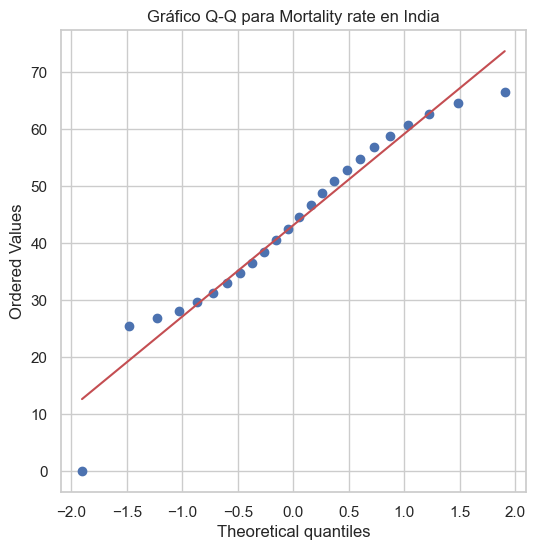

País: Maldives, Estadística: 0.9295676435291158, Valor p: 0.09534146946371834
Los datos parecen seguir una distribución normal


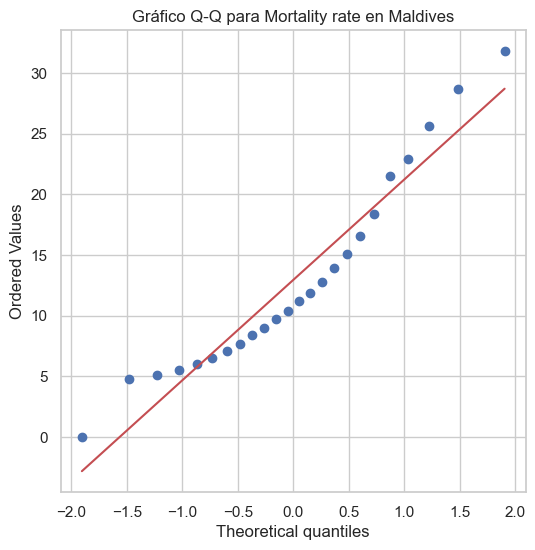

País: Sri Lanka, Estadística: 0.9711711119249847, Valor p: 0.6959533685504646
Los datos parecen seguir una distribución normal


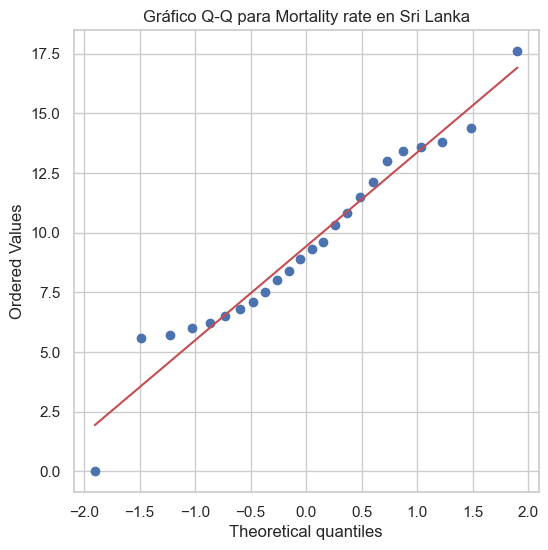

País: Nepal, Estadística: 0.9582801161939716, Valor p: 0.40485305307749636
Los datos parecen seguir una distribución normal


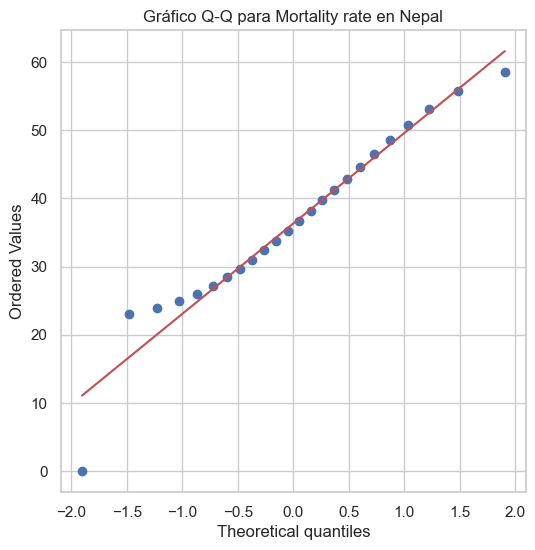

País: Pakistan, Estadística: 0.7791430246108905, Valor p: 0.0001369443420346064
Los datos no siguen una distribución normal


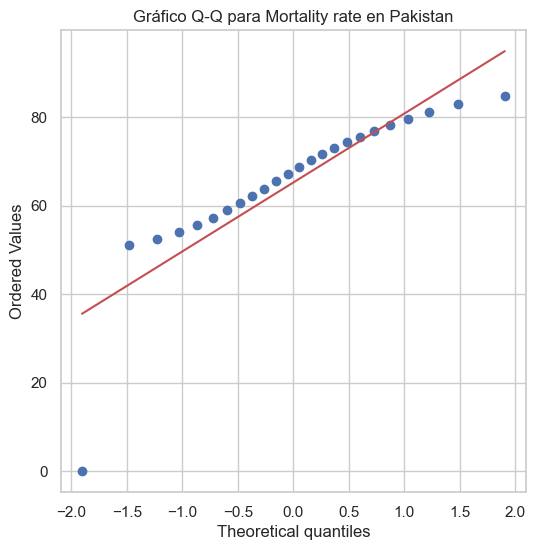

In [4]:

import matplotlib.pyplot as plt
from scipy.stats import shapiro, probplot
datos_por_pais = {}
for row in data:
    pais = row['Country']
    if pais not in datos_por_pais:
        datos_por_pais[pais] = {'GDP': [], 'GDP per capita': [], 'Unemployment': [], 'Population': [], 'Life expectancy': [], 'Mortality rate': []}
    datos_por_pais[pais]['GDP'].append(row['GDP (current US$)'])
    datos_por_pais[pais]['GDP per capita'].append(row['GDP per capita (current US$)'])
    datos_por_pais[pais]['Unemployment'].append(row['Unemployment, total (% of total labor force) (modeled ILO estimate)'])
    datos_por_pais[pais]['Population'].append(row['Population, total'])
    datos_por_pais[pais]['Life expectancy'].append(row['Life expectancy at birth, total (years)'])
    datos_por_pais[pais]['Mortality rate'].append(row['Mortality rate, infant (per 1,000 live births)'])

# Lista de variables a evaluar
variables = ['GDP', 'GDP per capita', 'Unemployment', 'Population', 'Life expectancy', 'Mortality rate']

# Prueba de Shapiro-Wilk y gráficos Q-Q por país
for variable in variables:
    print(f'\nPruebas de distribución para {variable} por país:')
    for pais, datos in datos_por_pais.items():
        data_pais = datos[variable]
        
        # Prueba de Shapiro-Wilk
        stat, p_value = shapiro(data_pais)
        print(f'País: {pais}, Estadística: {stat}, Valor p: {p_value}')
        if p_value > 0.05:
            print("Los datos parecen seguir una distribución normal")
        else:
            print("Los datos no siguen una distribución normal")
        
        # Gráfico Q-Q
        plt.figure(figsize=(6, 6))
        probplot(data_pais, dist="norm", plot=plt)
        plt.title(f'Gráfico Q-Q para {variable} en {pais}')
        plt.show()


Resultados de la regresión lineal para Bangladesh:
Slope: 1.781690023238451e+18
Intercept: -6.175670234330374e+18
R-squared: 0.5306821851416124
P-value: 5.428498505654965e-05
Standard error: 3.572210751969779e+17


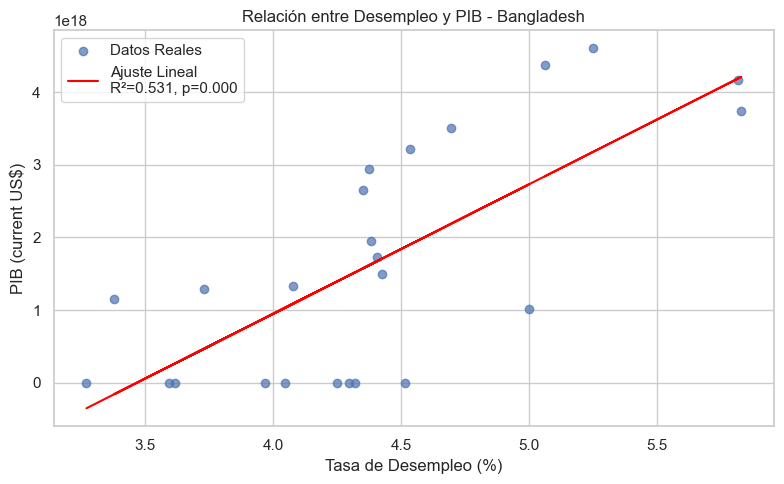

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Cargar el archivo (asegúrate de usar la ruta correcta)
file_path = 'Asiaticos.csv'
data = pd.read_csv(file_path)

# Convertir columnas relevantes a formato numérico
data["Unemployment, total (% of total labor force) (modeled ILO estimate)"] = pd.to_numeric(
    data["Unemployment, total (% of total labor force) (modeled ILO estimate)"], errors="coerce"
)
data["GDP (current US$)"] = pd.to_numeric(
    data["GDP (current US$)"].str.replace('.', '').str.replace(',', ''), errors="coerce"
)

# Filtrar datos para Bangladesh
bangladesh_data = data[data["Country"] == "Bangladesh"]

# Eliminar filas con valores faltantes en las columnas relevantes
bangladesh_data = bangladesh_data.dropna(subset=[
    "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "GDP (current US$)"
])

# Validar que haya suficientes puntos para realizar una regresión
if len(bangladesh_data) > 1:
    # Realizar regresión lineal
    slope, intercept, r_value, p_value, std_err = linregress(
        bangladesh_data["Unemployment, total (% of total labor force) (modeled ILO estimate)"],
        bangladesh_data["GDP (current US$)"]
    )
    
    # Mostrar resultados
    print(f"Resultados de la regresión lineal para Bangladesh:")
    print(f"Slope: {slope}")
    print(f"Intercept: {intercept}")
    print(f"R-squared: {r_value**2}")
    print(f"P-value: {p_value}")
    print(f"Standard error: {std_err}")
    
    # Visualización
    plt.figure(figsize=(8, 5))
    plt.scatter(
        bangladesh_data["Unemployment, total (% of total labor force) (modeled ILO estimate)"], 
        bangladesh_data["GDP (current US$)"], 
        label="Datos Reales", alpha=0.7
    )
    plt.plot(
        bangladesh_data["Unemployment, total (% of total labor force) (modeled ILO estimate)"],
        slope * bangladesh_data["Unemployment, total (% of total labor force) (modeled ILO estimate)"] + intercept,
        color="red",
        label=f"Ajuste Lineal\nR²={r_value**2:.3f}, p={p_value:.3f}",
    )
    plt.title("Relación entre Desempleo y PIB - Bangladesh")
    plt.xlabel("Tasa de Desempleo (%)")
    plt.ylabel("PIB (current US$)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("No hay suficientes datos para realizar una regresión lineal para Bangladesh.")



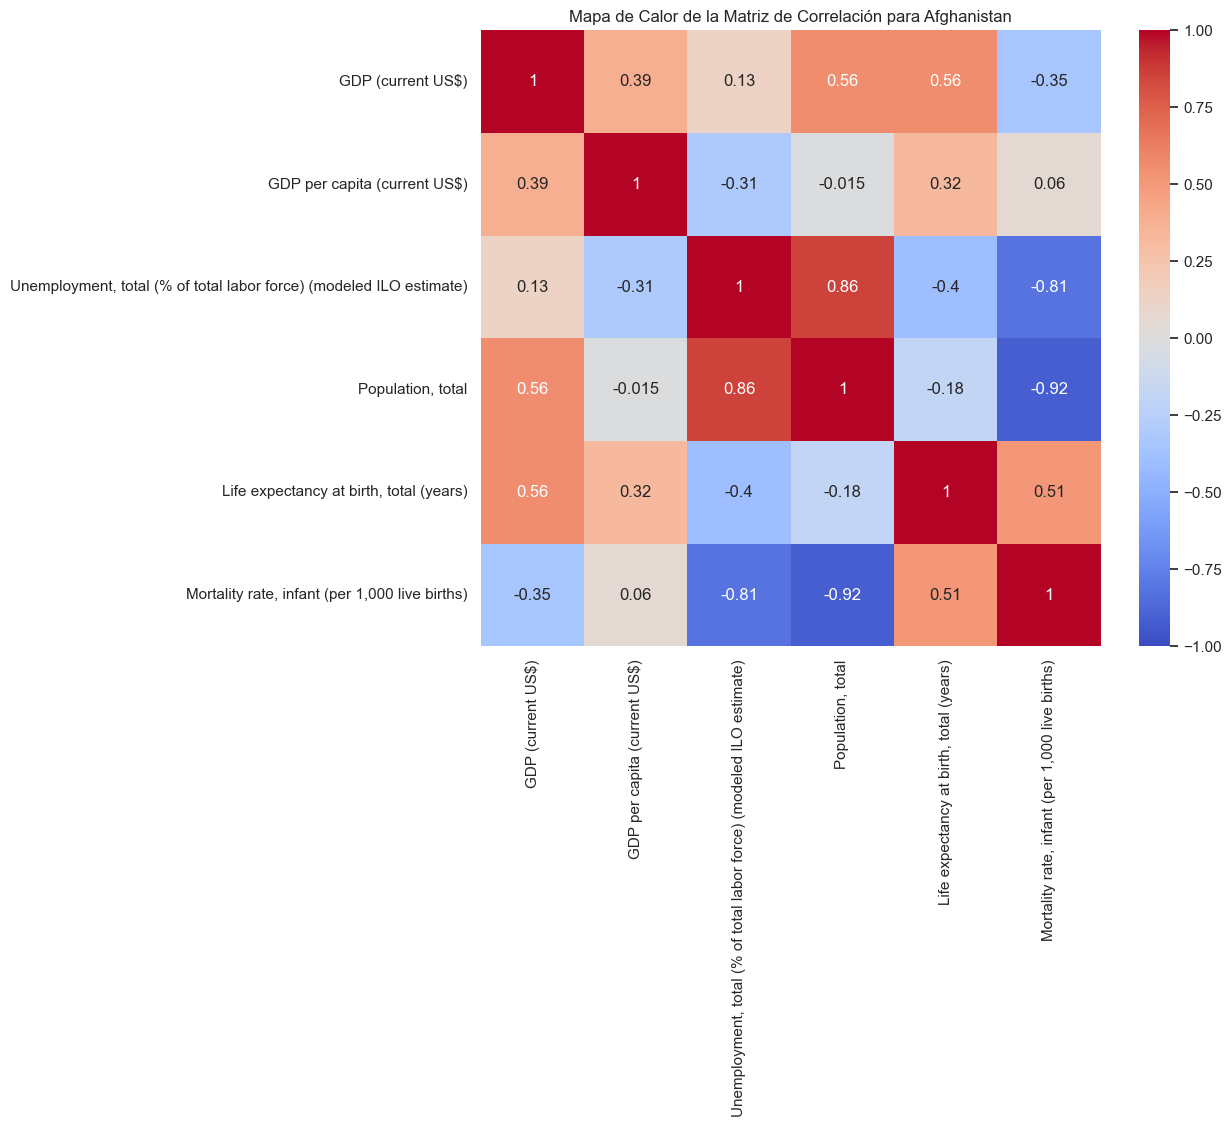

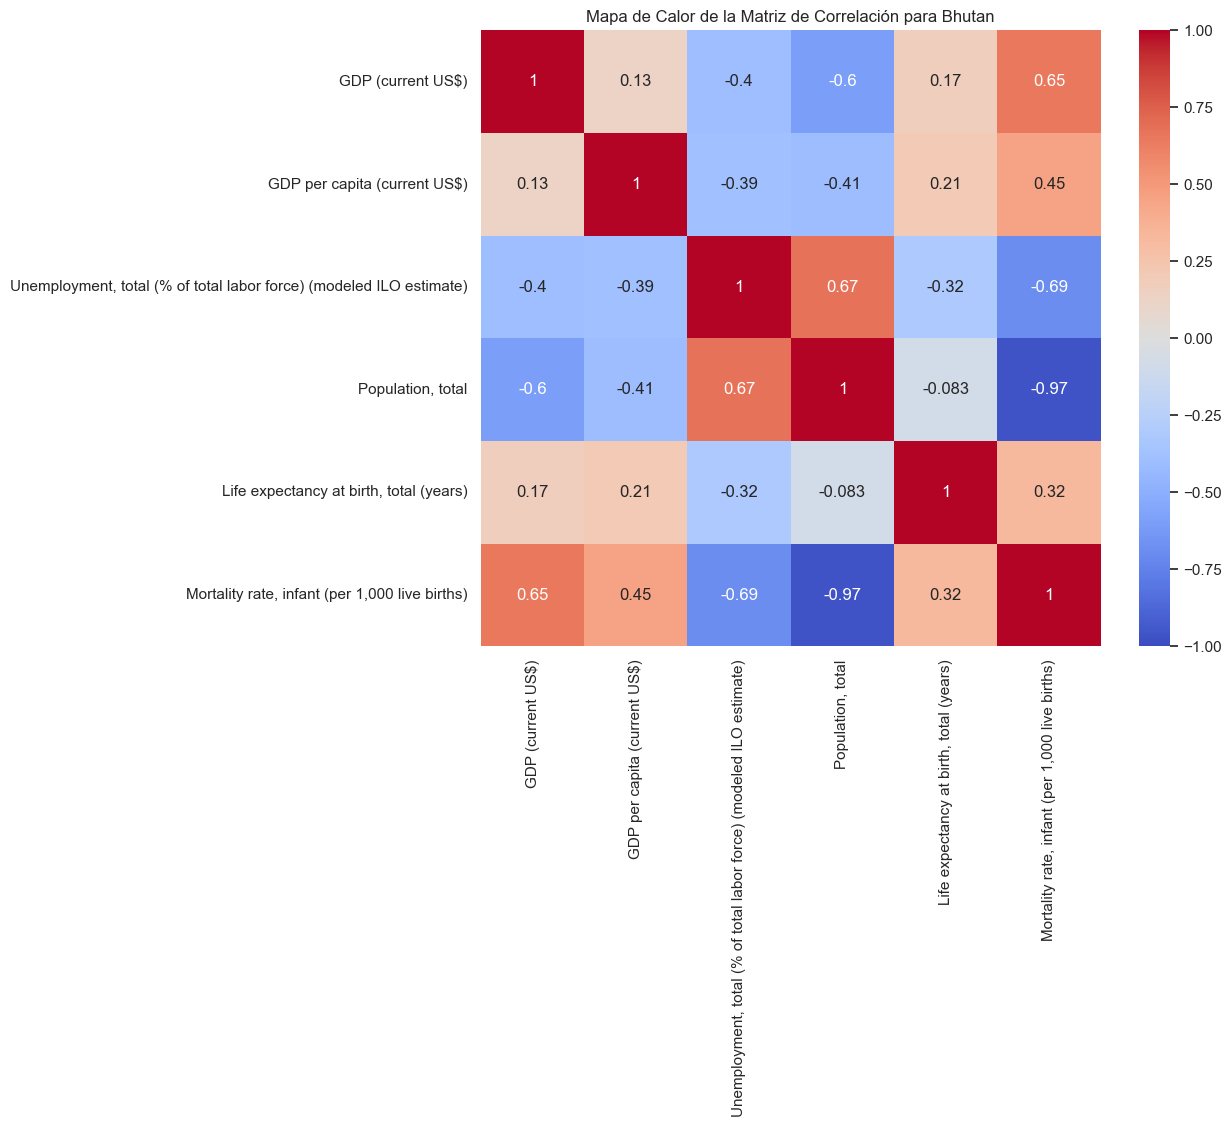

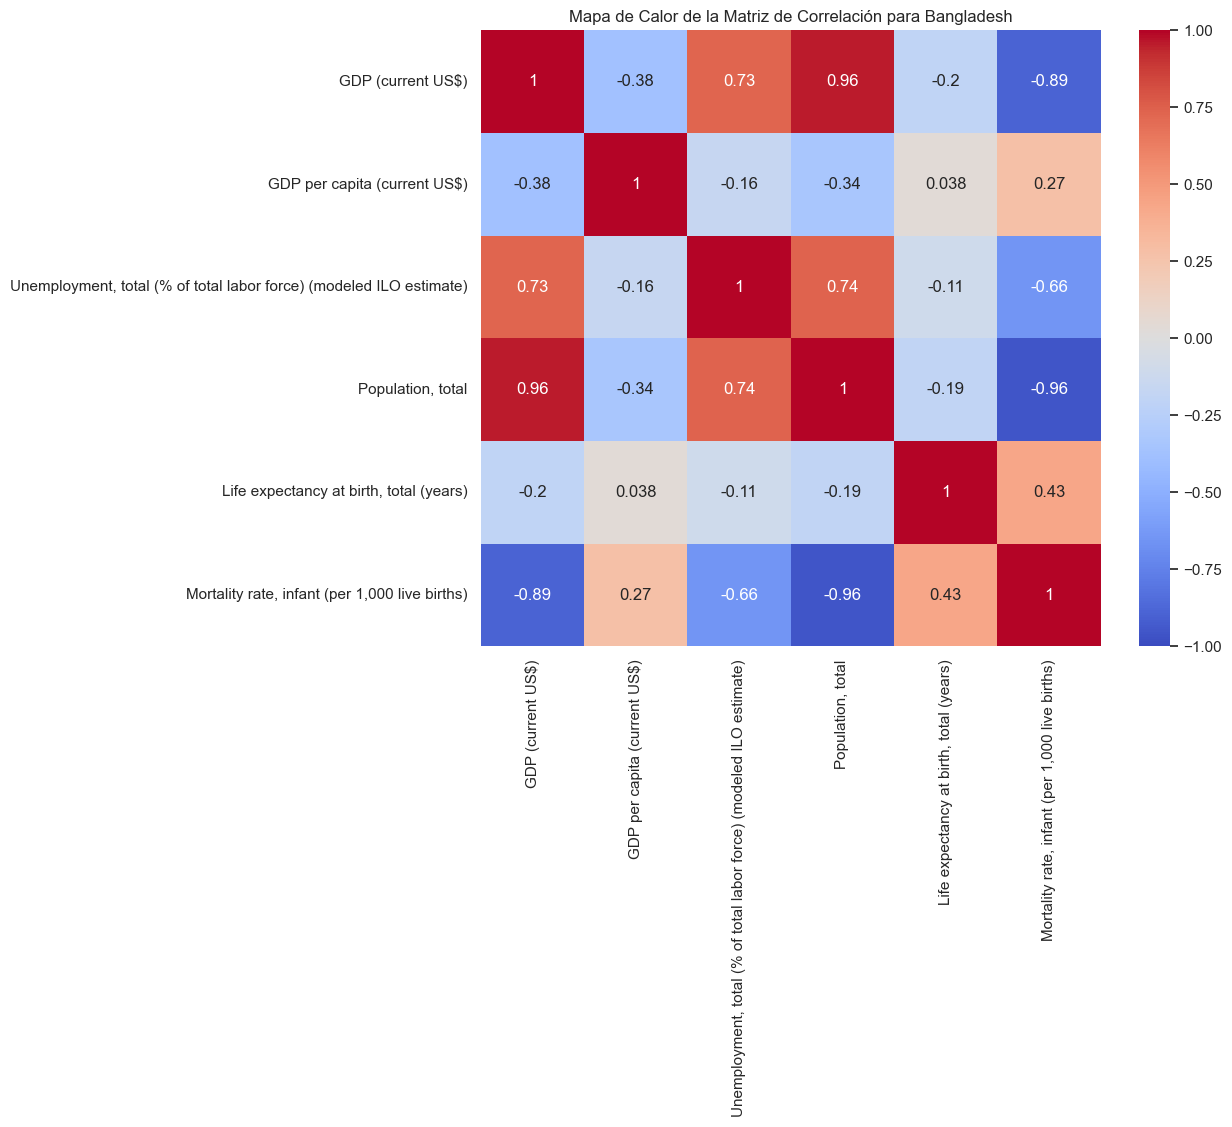

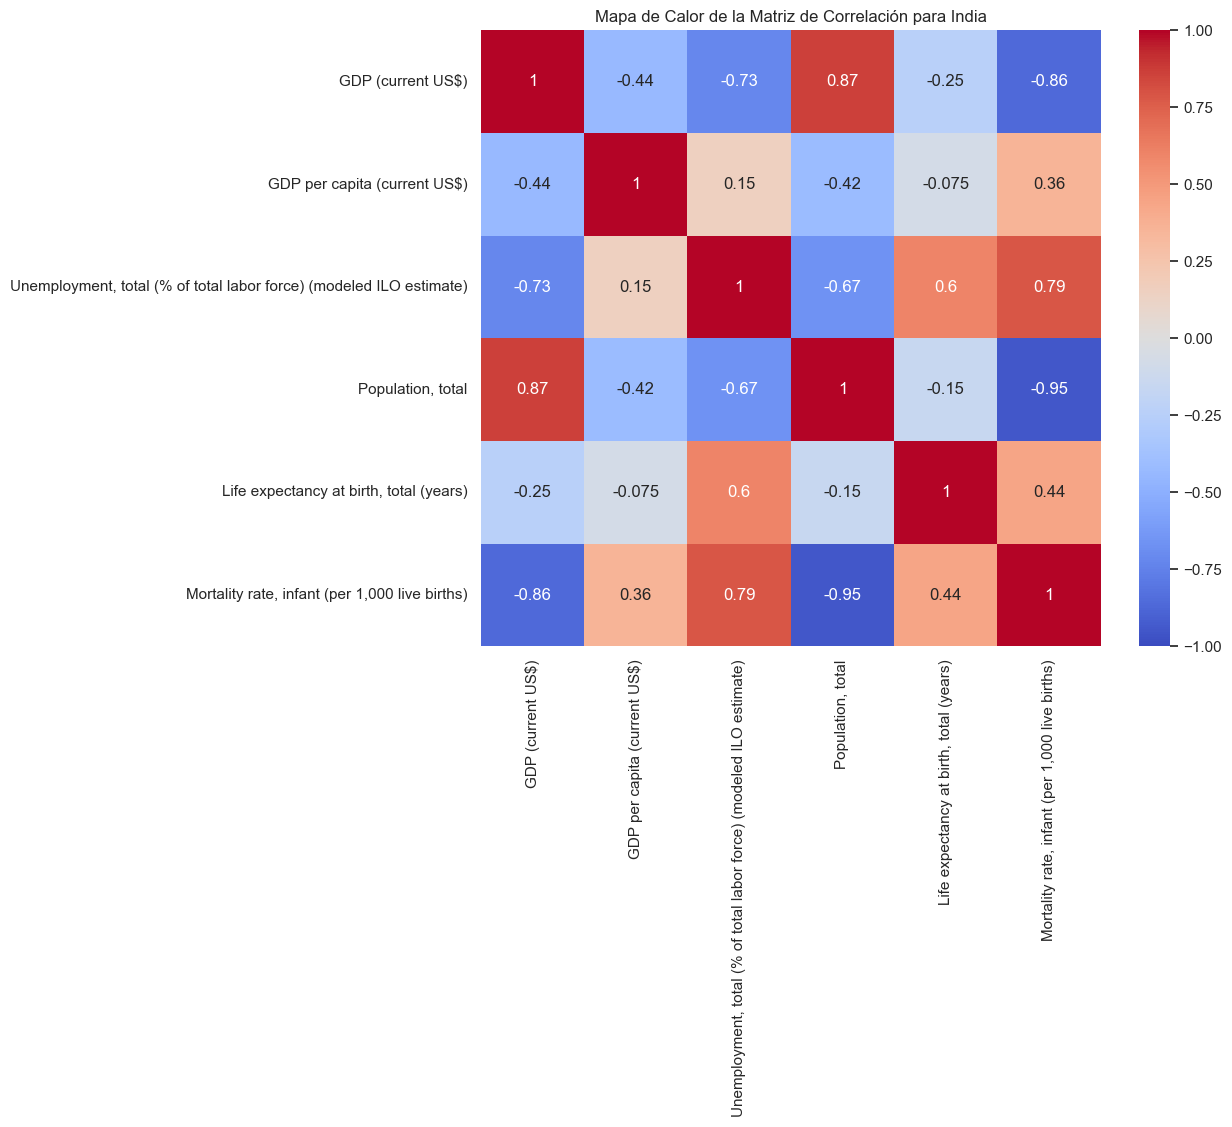

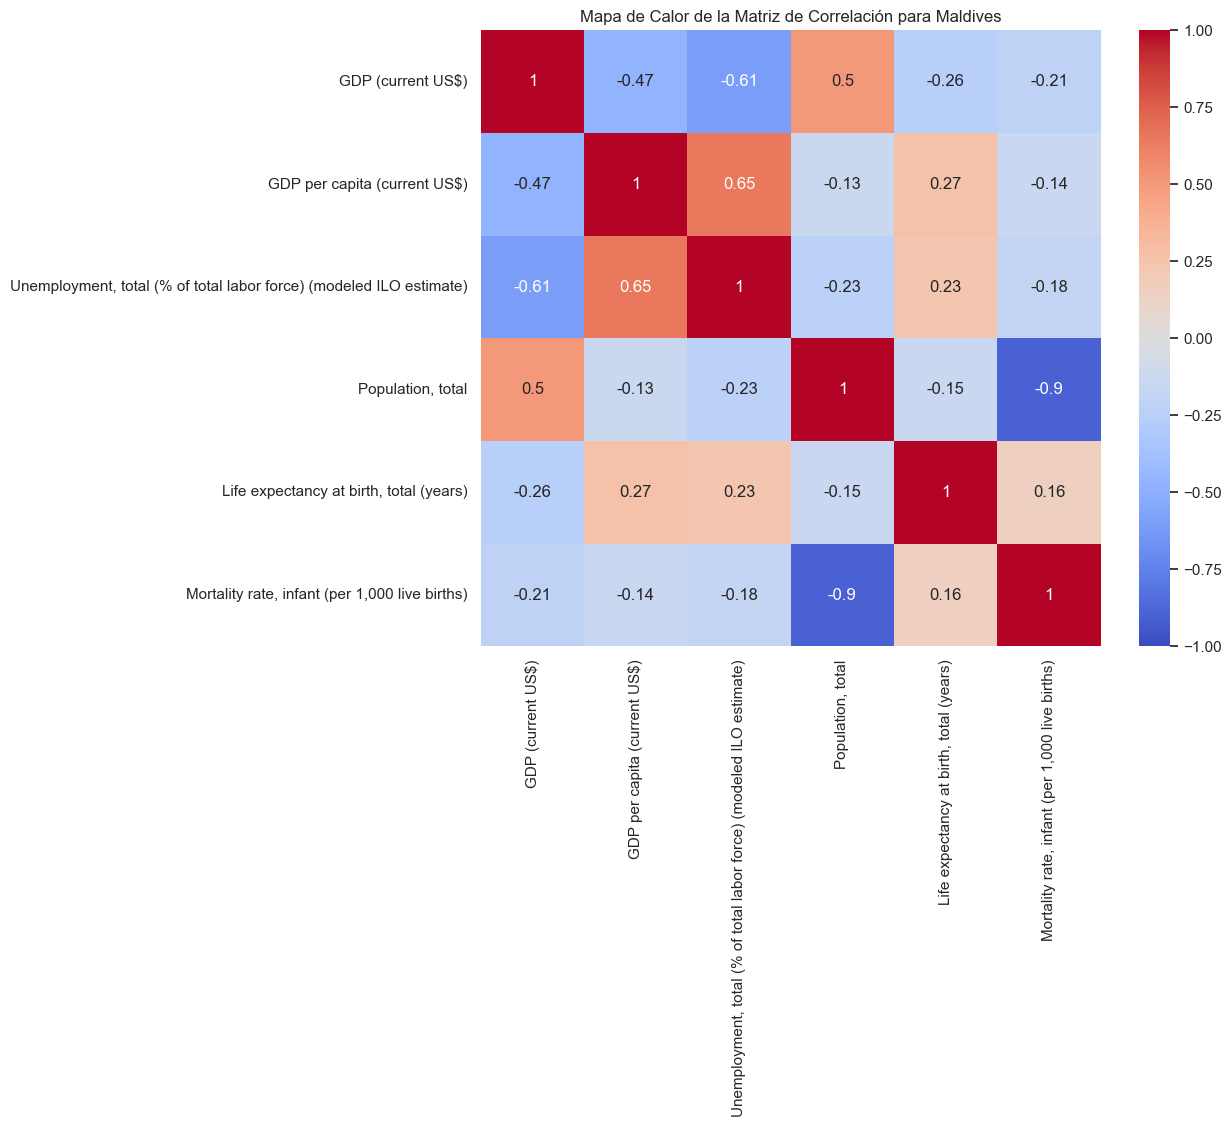

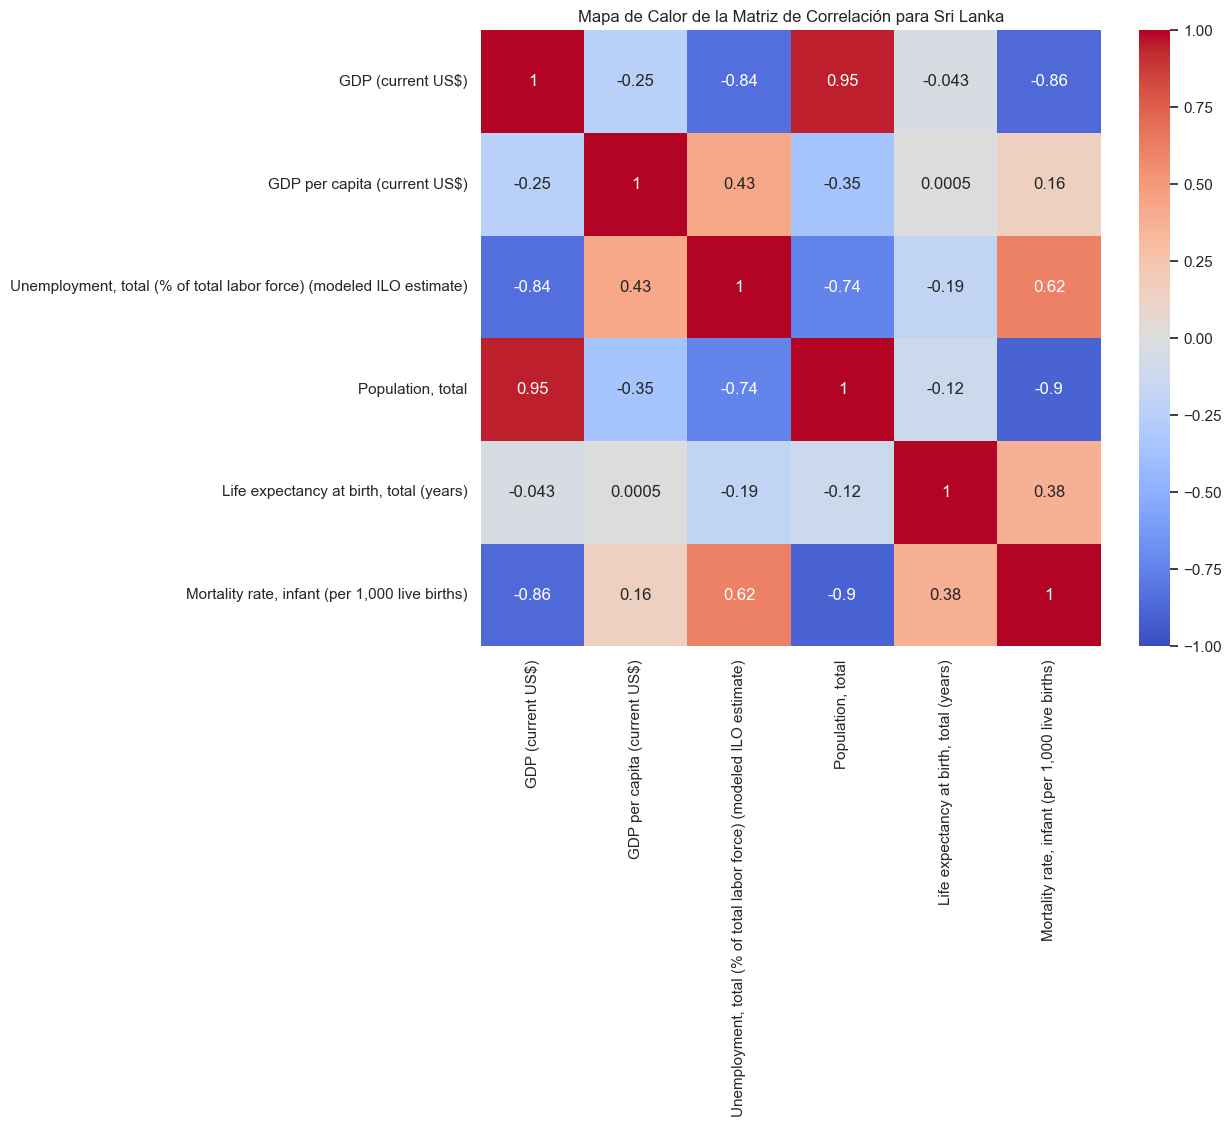

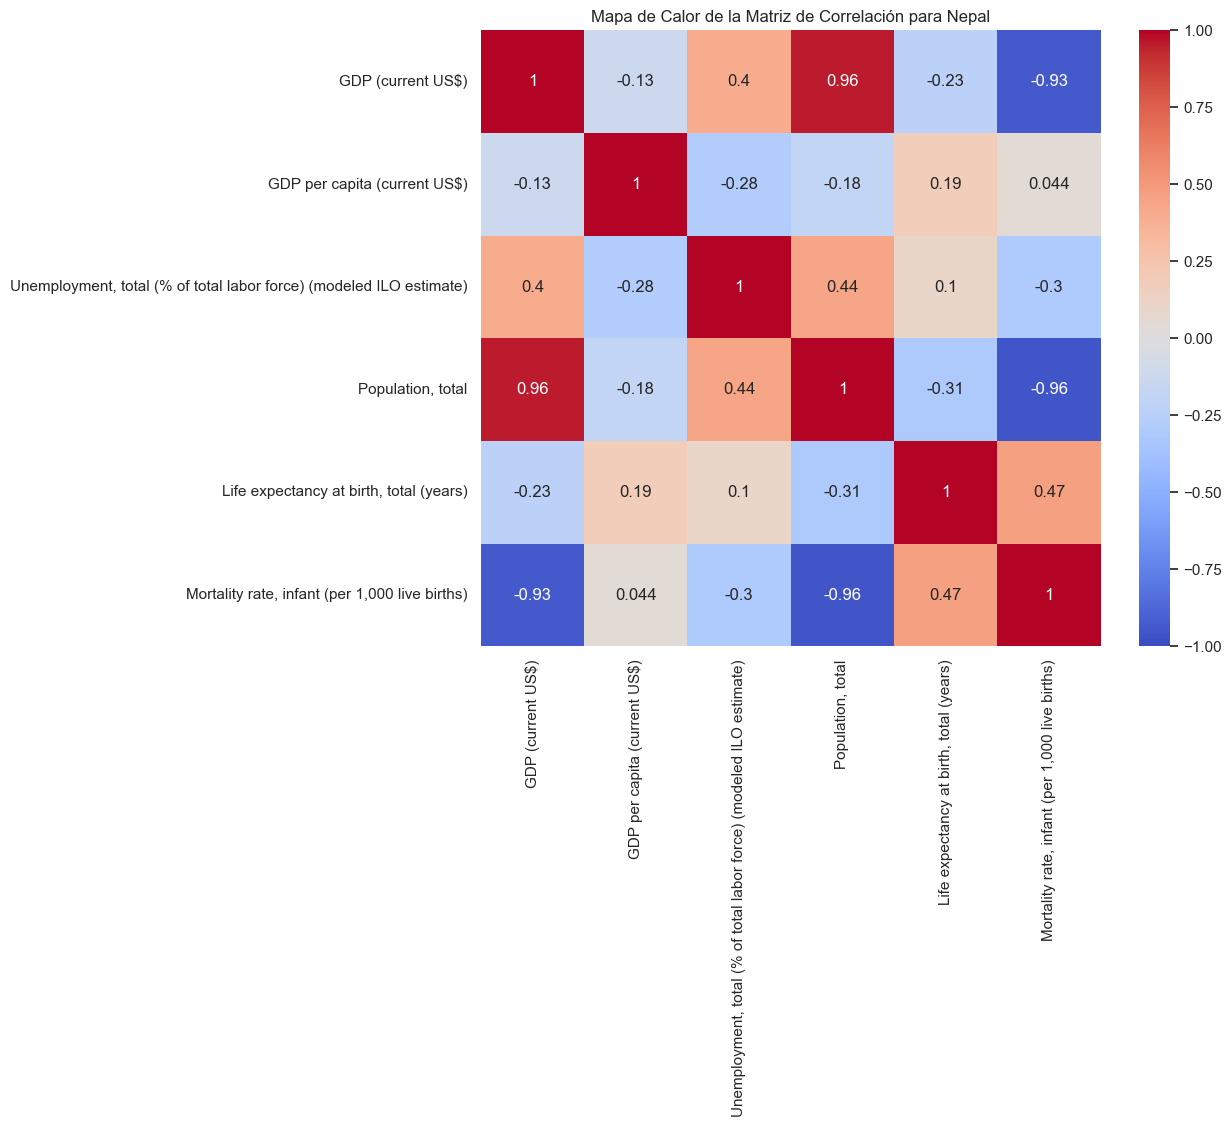

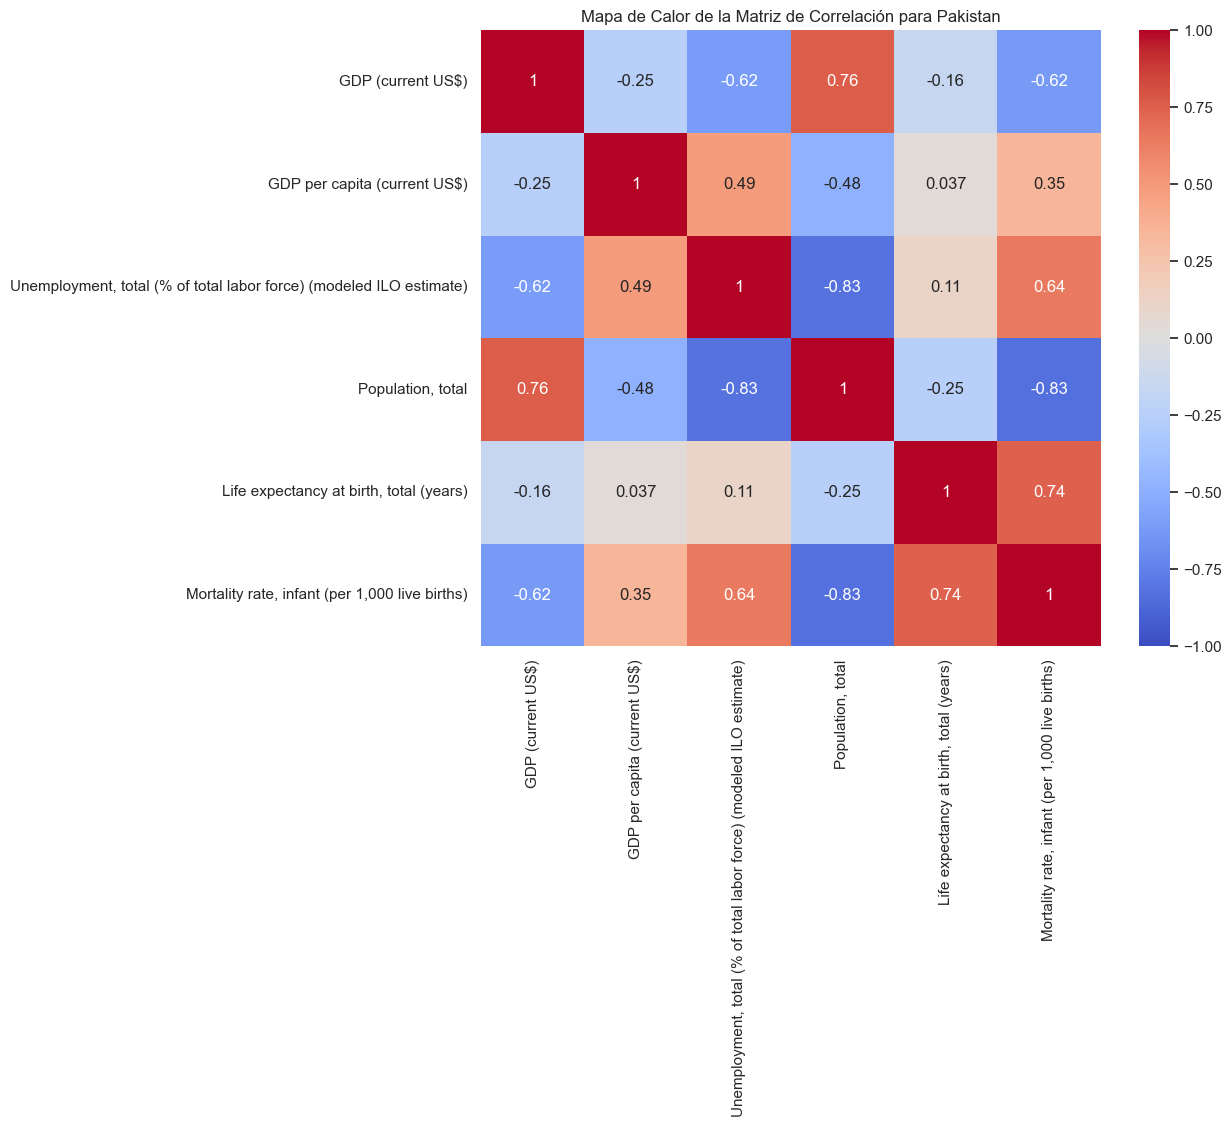

In [11]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos desde el archivo CSV
data = []
with open('Asiaticos.csv', newline='', encoding='utf-8') as archivo_csv:
    lector = csv.DictReader(archivo_csv)
    for row in lector:
        # Limpiar y convertir a float las columnas numéricas
        row['GDP (current US$)'] = float(row['GDP (current US$)'].replace('.', '').replace(',', ''))
        row['GDP per capita (current US$)'] = float(row['GDP per capita (current US$)'].replace('.', '').replace(',', ''))
        row['Unemployment, total (% of total labor force) (modeled ILO estimate)'] = float(row['Unemployment, total (% of total labor force) (modeled ILO estimate)'])
        row['Population, total'] = float(row['Population, total'].replace('.', '').replace(',', ''))
        row['Life expectancy at birth, total (years)'] = float(row['Life expectancy at birth, total (years)'])
        row['Mortality rate, infant (per 1,000 live births)'] = float(row['Mortality rate, infant (per 1,000 live births)'])
        
        data.append(row)

# Convertir a DataFrame de pandas
df = pd.DataFrame(data)

# Lista de variables numéricas
variables = ['GDP (current US$)', 'GDP per capita (current US$)', 'Unemployment, total (% of total labor force) (modeled ILO estimate)', 'Population, total', 'Life expectancy at birth, total (years)', 'Mortality rate, infant (per 1,000 live births)']

# Calcular la matriz de correlación por país y mostrar mapas de calor
for country in df['Country'].unique():
    df_pais = df[df['Country'] == country]
    df_pais_numerico = df_pais[variables]
    matriz_correlacion = df_pais_numerico.corr()
    # Generar mapa de calor
    plt.figure(figsize=(10, 8))
    sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Mapa de Calor de la Matriz de Correlación para {country}')
    plt.show()



In [7]:
import csv
import pandas as pd
from scipy import stats
import numpy as np

# Cargar datos desde el archivo CSV
data = []
with open('Asiaticos.csv', newline='', encoding='utf-8') as archivo_csv:
    lector = csv.DictReader(archivo_csv)
    for row in lector:
        # Limpiar y convertir a float las columnas numéricas
        try:
            row['Mortality rate, infant (per 1,000 live births)'] = float(row['Mortality rate, infant (per 1,000 live births)'])
            data.append(row)
        except ValueError:
            continue  # Ignorar filas con valores no convertibles

# Convertir a DataFrame de pandas
df = pd.DataFrame(data)

# Agrupar datos por país
datos_por_pais = {}
for row in data:
    pais = row['Country']
    if pais not in datos_por_pais:
        datos_por_pais[pais] = []
    # Asegurarse de que solo se agreguen valores válidos
    if 'Mortality rate, infant (per 1,000 live births)' in row and isinstance(row['Mortality rate, infant (per 1,000 live births)'], float):
        datos_por_pais[pais].append(row['Mortality rate, infant (per 1,000 live births)'])

# Valor hipotético
valor_hipotetico = 30

# Realizar la prueba t de una muestra para cada país
for pais, mortalidad in datos_por_pais.items():
    if len(mortalidad) > 0:  # Asegúrate de que hay datos suficientes
        t_stat, p_value = stats.ttest_1samp(mortalidad, valor_hipotetico)
        
        # Ajustar el valor p para una prueba unilateral (menor que)
        p_value_unilateral = p_value / 2 if t_stat < 0 else 1 - p_value / 2
        

País: Afghanistan, Estadística t: 8.0024, Valor p (unilateral): 1.0000

No podemos rechazar la hipótesis nula. No hay evidencia suficiente para afirmar que la media de la tasa de mortalidad infantil de 'Afghanistan' es menor que 30.

País: Bhutan, Estadística t: 1.0130, Valor p (unilateral): 0.8392

No podemos rechazar la hipótesis nula. No hay evidencia suficiente para afirmar que la media de la tasa de mortalidad infantil de 'Bhutan' es menor que 30.

País: Bangladesh, Estadística t: 2.7108, Valor p (unilateral): 0.9938

No podemos rechazar la hipótesis nula. No hay evidencia suficiente para afirmar que la media de la tasa de mortalidad infantil de 'Bangladesh' es menor que 30.

País: India, Estadística t: 4.0921, Valor p (unilateral): 0.9998

No podemos rechazar la hipótesis nula. No hay evidencia suficiente para afirmar que la media de la tasa de mortalidad infantil de 'India' es menor que 30.

País: Maldives, Estadística t: -10.1977, Valor p (unilateral): 0.0000

Rechazamos la hipótesis nula. La media de la tasa de mortalidad infantil de 'Maldives' es significativamente menor que 30.

País: Sri Lanka, Estadística t: -26.2881, Valor p (unilateral): 0.0000

Rechazamos la hipótesis nula. La media de la tasa de mortalidad infantil de 'Sri Lanka' es significativamente menor que 30.

País: Nepal, Estadística t: 2.3834, Valor p (unilateral): 0.9871

No podemos rechazar la hipótesis nula. No hay evidencia suficiente para afirmar que la media de la tasa de mortalidad infantil de 'Nepal' es menor que 30.

País: Pakistan, Estadística t: 10.0697, Valor p (unilateral): 1.0000

No podemos rechazar la hipótesis nula. No hay evidencia suficiente para afirmar que la media de la tasa de mortalidad infantil de 'Pakistan'

In [8]:
import csv
import pandas as pd
from scipy import stats
import numpy as np

# Cargar datos desde el archivo CSV
data = []
with open('Asiaticos.csv', newline='', encoding='utf-8') as archivo_csv:
    lector = csv.DictReader(archivo_csv)
    for row in lector:
        # Limpiar y convertir a float las columnas numéricas
        row['GDP (current US$)'] = float(row['GDP (current US$)'].replace('.', '').replace(',', ''))
        row['Unemployment, total (% of total labor force) (modeled ILO estimate)'] = float(row['Unemployment, total (% of total labor force) (modeled ILO estimate)'])
        data.append(row)

# Convertir a DataFrame de pandas
df = pd.DataFrame(data)

# 2. Calcular intervalos de confianza para la media del PIB y desempleo
intervalos_confianza = []

for country in df['Country'].unique():
    subset = df[df['Country'] == country]
    
    if len(subset) > 1:
        mean_gdp = subset['GDP (current US$)'].mean()
        std_gdp = subset['GDP (current US$)'].std()
        n_gdp = len(subset['GDP (current US$)'])
        
        mean_unemployment = subset['Unemployment, total (% of total labor force) (modeled ILO estimate)'].mean()
        std_unemployment = subset['Unemployment, total (% of total labor force) (modeled ILO estimate)'].std()
        n_unemployment = len(subset['Unemployment, total (% of total labor force) (modeled ILO estimate)'])
        
        # Intervalo de confianza del 95%
        ci_gdp = stats.t.interval(0.95, n_gdp-1, loc=mean_gdp, scale=std_gdp/np.sqrt(n_gdp))
        ci_unemployment = stats.t.interval(0.95, n_unemployment-1, loc=mean_unemployment, scale=std_unemployment/np.sqrt(n_unemployment))
        
        intervalos_confianza.append({
            'País': country,
            'IC PIB': ci_gdp,
            'IC Desempleo': ci_unemployment,
        })

# 3. Comparar medias entre India y Sri Lanka
india_data = df[df['Country'] == 'India']['GDP (current US$)']
sri_lanka_data = df[df['Country'] == 'Sri Lanka']['GDP (current US$)']

if len(india_data) > 1 and len(sri_lanka_data) > 1:
    t_statistic_comparison, p_value_comparison = stats.ttest_ind(india_data, sri_lanka_data)
    resultado_comparacion = {
        'Países': 'India vs Sri Lanka',
        'Estadística t': t_statistic_comparison,
        'Valor p': p_value_comparison,
    }
else:
    resultado_comparacion = {
        'Países': 'India vs Sri Lanka',
        'Estadística t': None,
        'Valor p': None,
    }


La comparación entre India y Sri Lanka que hemos proporcionado muestra los resultados de una prueba t de Student, donde se calculó la estadística t y el valor p. Aquí está la interpretación de estos resultados:
Resultados
Estadística t: 7.0171
Valor p: 
8.59
×
1
0
−
9
8.59×10 
−9
 
Interpretación
Estadística t:
La estadística t es un valor que indica cuán lejos está la media de los dos grupos (en este caso, el PIB o desempleo de India y Sri Lanka) en relación con la variabilidad dentro de esos grupos. Un valor t alto (como 7.0171) sugiere que hay una diferencia considerable entre las medias de los dos grupos.
Valor p:
El valor p asociado a esta estadística es extremadamente bajo (
8.59
×
1
0
−
9
8.59×10 
−9
 ), lo que indica que la probabilidad de observar una diferencia tan extrema entre las medias si la hipótesis nula fuera cierta es casi nula.
En general, si el valor p es menor que un nivel de significancia comúnmente utilizado (como 0.05 o 0.01), se rechaza la hipótesis nula.
Hipótesis nula:
La hipótesis nula en este contexto sería que no hay diferencia significativa entre las medias del PIB o desempleo de India y Sri Lanka.
Dado el valor p extremadamente bajo, se rechaza la hipótesis nula, lo que sugiere que hay una diferencia significativa entre las medias de PIB o desempleo entre India y Sri Lanka.

Intervalos de confianza:

País: Afghanistan, IC PIB: (9666963692.85173, 15428788958.981602), 
IC Desempleo: (8.432380542500665, 10.208452790832668)

País: Bhutan, IC PIB: (2335251413.406396, 4415320217.676937),
 IC Desempleo: (2.7211529001639754, 3.7160137665026918)

País: Bangladesh, IC PIB: (9.44598998263091e+17, 2.317901051726327e+18), 
IC Desempleo: (4.100999085214714, 4.662500914785286)

País: India, IC PIB: (1.1292411430111605e+19, 2.07338385698884e+19), 
IC Desempleo: (7.240707068472929, 8.210626264860403)

País: Maldives, IC PIB: (2822388151.95378, 4578322915.879553),
 IC Desempleo: (5.56550774624772, 7.790242253752281)

País: Sri Lanka, IC PIB: (45528837152.68295, 70704224965.31705),
 IC Desempleo: (5.096079335290024, 6.440920664709977)

País: Nepal, IC PIB: (15193743972.720688, 25292404125.445976), 
IC Desempleo: (10.581836383612853, 11.089663616387146)

País: Pakistan, IC PIB: (1.3795716556669952e+18, 2.470595035545815e+18), 
IC Desempleo: (163.9551573590441, 418.6242593076225)